# Héctor Delgado Díaz and Samantha Gilbert

## Exoplanets Spring 2020

## HW 1a

### Problem 1

In this problem, we wish to develop a Kepler's EQ solver. We outlined the method we will use in class, in which we will optimize over Kepler's equation using Newton's method.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import optimize
import pandas as pd

In [2]:
# We first define a function that gives the solution to 
# the two-body problem in the form of Kepler's equation. 
# Since M = E - e * sin(E), we expect this function to equal 
# approximately 0 when correct. We will optimize over this 
# function using Newton's method.
#
# E = eccentric anomaly
# e = eccentricity 
# M = mean anomaly

def g(E, e, m):
    return E - e * np.sin(E) - m

In [3]:
# We now define a function that gives the partial derivative 
# of our first function g with respect to the eccentric anomaly E.
# Calculating the value of this partial derivative will help us
# to calculate E_i+1 at each subsequent iteration.

def dg_dE(E, e):
    return 1 - e * np.cos(E) 

In [4]:
# We will optimize over our function for g using Newton's method.
# In this method, we initialize the function with a starting guess 
# for the zeroth E given by:
# 
# E_0 = M + 0.85 * e * sign(sin(M)) 
# 
# where "sign" indicates a conditional function that changes the sign 
# in front of sin(M). 
# 
# We then iterate until we converge on a value for E. We accomplish
# this iteration by finding
# 
# dg/dE = 1 - e * cos(E)
# 
# and define each subsequent iteration of E relative to the last using
# the recursive relation
#
# E_i+1 = E_i - g(E, e, M)/(dg/dE)

def kepler(M, e):
    
    #Calculate initial values for E, g, and dg/dE.
    
    E_0 = M + 0.85 * e * np.sign(np.sin(M))
    
    g_0 = g(E_0, e, M) # Calculate the zeroth g given the zeroth E value
    
    dg_dE_0 = dg_dE(E_0, e) # Calculate the zeroth partial deriv. given the zeroth E value
    
    
    # Continue to interate as long as the last E value exceeds the given tolerance.
    
    while np.amax(abs(-g(E_0, e, M)/dg_dE(E_0, e))) > 1E-9: # We define our tolerance for convergence to be 1e-14 based on the recommendation given in class
        
        E = E_0 - (g(E_0, e, M) / dg_dE(E_0, e)) # Calculate the next E value
        
        E_0 = E # Set the last E value as the new starting value
        
    return E_0 

Now that we have built our solver, we can test it by running it on a grid of e and M values and  verifying that the calculated E values always return the same M values. After calculating E and M, we compare the calculated M values to the true M values by subtracting the two. We observe that all differences return answers equal or very close to zero, showing that our solver works.

We also show a plot comparing the E and M orbital parameters. We see that for e = 0, or a circular orbit, we have E = M which produces a straight line on the plot. For increasingly higher eccentricities, the E and M values diverge more and more, culminating in the teal line representing the highest eccentricity.

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


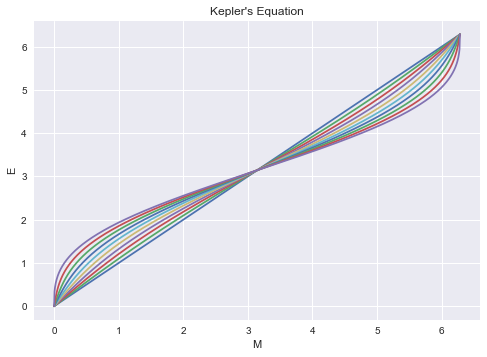

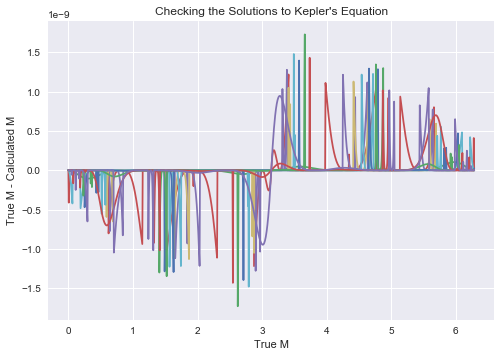

In [5]:
# Now that we have defined the necessary functions, we can test
# our solver on an array of e and M values. As given by the question,
# we will test values
# 
# 0 < e < 1
#
# and
#
# 0 < M < 2 * np.pi

e_vals = np.linspace(0, 1, 10) 

M_vals = np.linspace(0, 2 * np.pi, 1000)

'''-------------------------------------------------------------------'''

# Create the figure.

fig1 = plt.figure()

ax1 = plt.axes()

ax1.set_title('Kepler\'s Equation')

fig2 = plt.figure()

ax2 = plt.axes()

ax2.set_title('Checking the Solutions to Kepler\'s Equation')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    M_calc = []
    
    for M in M_vals:
        
        E = kepler(M, e) # Calculate E for the given M and e grids.
        
        E_ans.append(E) # Populate the array with the E's we've calculated.
        
        M_calc.append(E - e * np.sin(E))
        
    ax1.plot(M_vals, E_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    ax2.plot(M_vals, M_vals - M_calc)      
    
ax1.set_xlabel('M')

ax1.set_ylabel('E')

ax2.set_xlabel('True M')

ax2.set_ylabel('True M - Calculated M')

### Problem 2
In this problem, we will test our solver on a grid of e and M values and verify that we have actually optimized the function g using Newton's method. In order to verify this, we will calculate the solution to the function g for this e, M grid, and verify that the solutions are lower than the tolerance we set in our solver. This exercise produces very similar results to our last check, as the function g is essentially the difference between the "true" M and the calcualted M.

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


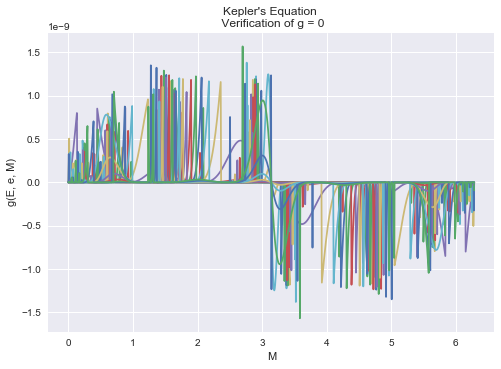

In [6]:
e_vals = np.linspace(0, 1, 20) 

M_vals = np.linspace(0, 2 * np.pi, 1000)


# Create the figure.

fig = plt.figure()

ax = plt.axes()

ax.set_title('Kepler\'s Equation \n Verification of g = 0')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    g_ans = [] # Initialize an array for storing our calculated g's.
    
    for M in M_vals:
        
        E_vals = kepler(M, e) # Calculate E for the given M and e grid.
        
        E_ans.append(E_vals) # Populate the array with the E's we've calculated.
        
        g_vals = g(E_vals, e, M) # Calculate g for the given M and e grid and the E's we calculated.
        
        g_ans.append(g_vals) # Populate the array with the g's we've calculated.
        
    ax.plot(M_vals, g_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    #print(np.shape(g_ans))
    
ax.set_xlabel('M')

ax.set_ylabel('g(E, e, M)')

## HW 1b

### Problem 1

In this problem, we want to write a function to implement the radial velocity/Doppler formula for a planet on an elliptical orbit by calling our Kepler solver.

In [7]:
# We use the radial velocity formula outlined in Wright & Howard (2009)
# to implement the RV/Doppler formula for a planet on an elliptical orbit.
# As defined in the paper, we take:
#
# h = K_star * cos(pomega)
#
# c = -K_star * sin(pomega)
#
# v_0 = gamma + K_star * cos(pomega)
#
# The variable "f" represents the true anomaly, which we will calculate 
# using the E values we calculated from our Kepler solver.
#
# Putting these variables in terms of the usual parameters in the "verbose"
# equation, we have
#
# K_star = (h**2 + c**2)**(1/2)
#
# gamma = v_0 - e * h
# 
# pomega = arccos(h / K)

def calc_rv(h, c, v_0, f):
    return np.multiply(h, np.cos(f)) + np.multiply(c, np.sin(f)) + v_0

def f(e, E):
    return 2 * np.arctan( ((1 + e) / (1 - e))**(1/2) * np.tan(E / 2) )


### Problem 2

In this problem, we want to write a function to calculate the phase from the RV dataset provided in the "mystery planet" text file. We then want to plot a periodogram for this data.

In [8]:
path = '/Users/samanthagilbert/Desktop/'

file_name = 'mystery_planet01.txt'

data = pd.read_csv(path+file_name, delim_whitespace=True, header=None)

time = data[0]
rv = data[1]
rv_err = data[2]

data.columns = ['time','rv','rv_err']

In [9]:
# By definition, the phase of a sinusoid is equal to time divided 
# by the period. Here, P = orbital period.

def calc_phase(time, P):
    phase = (time % P)
    #print(phase)
    return phase

We now want a function that calculates the scatter of the RV based on the period time. We define scatter at each period to be the difference in neighboring radial velocity data squared such that

$$\sigma = (RV_i - RV_{i+1})^2 $$

The best fit period will minimize the scatter.

In [10]:
# The formula is given by
#
# S_p = Sum(v_i - v_(i+1))^2 from i=1 to i = N-1
#
# S_p is the scattering per period and v denotes the radial velocity at two adjacent intervals.
# The sum is over all the radial velocities.

def calc_scatter(rv_sort): # The RV is sorted in terms of the phase
    N = rv_sort.shape[0]
    scatter = 0
    for i in range(N - 1):
        scatter += (rv_sort[i] - rv_sort[i + 1])**2
    return scatter

We define a periodogram function to create the plots of the RV in terms of the RV scattering and the period of the planet.

In [11]:
calc_scatter(data.sort_values('{:3f}'.format(p)).rv.values)

NameError: name 'p' is not defined

In [12]:
scatters = []
for p in np.linspace(1, 200, 10000):
    data['{:3f}'.format(p)] = calc_phase(data.time, p)
    scatters.append(calc_scatter(data.sort_values('{:3f}'.format(p)).rv.values))
    print(p)

plt.plot(np.linspace(1, 200, 10000),scatters)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Period [JD]')
ax.set_ylabel('Adjacent Scatter')
plt.show()

1.0
1.0199019901990198
1.03980398039804
1.0597059705970597
1.0796079607960796
1.0995099509950994
1.1194119411941195
1.1393139313931393
1.1592159215921591
1.1791179117911792
1.199019901990199
1.2189218921892189
1.238823882388239
1.2587258725872588
1.2786278627862786
1.2985298529852987
1.3184318431843185
1.3383338333833383
1.3582358235823582
1.3781378137813782
1.398039803980398
1.417941794179418
1.4378437843784377
1.4577457745774578
1.4776477647764776
1.4975497549754975
1.5174517451745175
1.5373537353735374
1.5572557255725572
1.5771577157715773
1.597059705970597
1.616961696169617
1.636863686368637
1.6567656765676568
1.6766676667666767
1.6965696569656967
1.7164716471647163
1.7363736373637364
1.7562756275627565
1.776177617761776
1.7960796079607961
1.815981598159816
1.8358835883588358
1.8557855785578559
1.8756875687568757
1.8955895589558955
1.9154915491549156
1.9353935393539354
1.9552955295529553
1.9751975197519753
1.9950995099509952
2.015001500150015
2.034903490349035
2.0548054805480547
2.

KeyboardInterrupt: 

Having plotted scatters for multiple periods, we find the period that minimizes the scatter to identify the orbital period of the RV data.

In [15]:
np.linspace(1, 200, 10000)[np.argmin(scatters)]

111.47594759475948

We find that the period that minimizes the scatter is P = 111.356 JD. Using this period to resort our RV and folded time data, we can produce a new periodogram.

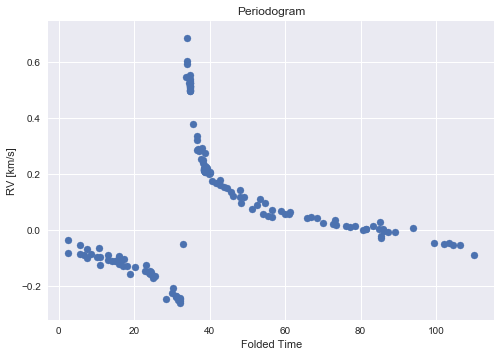

In [23]:
p = 111.467
data['{:3f}'.format(p)] = calc_phase(data.time, p)
rv_periodogram = data.sort_values('{:3f}'.format(p)).rv.values
folded_time = data.sort_values('{:3f}'.format(p))['{:3f}'.format(p)]

plt.scatter(folded_time,rv_periodogram)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Folded Time')
ax.set_ylabel('RV [km/s]')
plt.show()

### Problem 3

In this problem, we will fit the folded RV data and adjust the parameters to improve our fit. We will then report the best fit values for P, e, $t_p$, $\gamma$, and K.

#### Step 1: Optimize the orbital parameters M, E, and f.

The first objective for fitting the RV data is to optimize the orbital parameters. We use the functions we previously defined to calculate the predicted RV and f, as well as our Kepler solver to find E. 

In [14]:
# We define two new functions to calculate the orbital parameter M (mean amomaly) 
# and the chi squared.

def M(P, t, t_p):
    return (2 * np.pi * (t - t_p)) / P

def chi_squared(rv, rv_err, calc_rv):
    return np.sum((rv - calc_rv)**2 / rv_err**2)

In [15]:
def solve_hcv(time_data, rv_data, rv_err, P, e, t_p):
    
    M_vector = M(P, time_data, t_p)
    E_vector = kepler(M_vector, e)
    f_vector = f(e, E_vector)
    
    W = np.diag(1 / (rv_err ** 2.))
    F = np.concatenate([np.cos(f_vector).reshape(-1,1),
                        np.sin(f_vector).reshape(-1,1),
                        np.ones(f_vector.shape[0]).reshape(-1,1)], axis = 1).T
    
    eye = 1e-9 * np.diag(np.ones(F.shape[0]))
    cov = np.linalg.inv(F.dot(W).dot(F.T) + eye)
    
    beta = rv_data.reshape(1,-1).dot(W).dot(F.T).dot(cov).reshape(-1)
    
    predicted_rv = calc_rv(beta[0], beta[1], beta[2], f_vector)
    
    return beta, chi_squared(rv, rv_err, predicted_rv)

In [16]:
rv_periodogram = data.sort_values('{:3f}'.format(p)).rv.values
folded_time = data.sort_values('{:3f}'.format(p))['{:3f}'.format(p)]
rv_err_folded = data['rv_err'].iloc[folded_time.index]

In [17]:
def obj_func(P, e, t_p):

    time_data = folded_time.values
    rv_data = rv_periodogram
    rv_err = rv_err_folded.values
    
    beta, chi_sq = solve_hcv(time_data, rv_data, rv_err, P, e, t_p)
    
    return beta, chi_sq

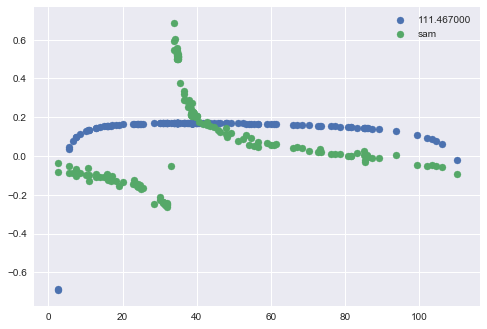

182314.56768819023


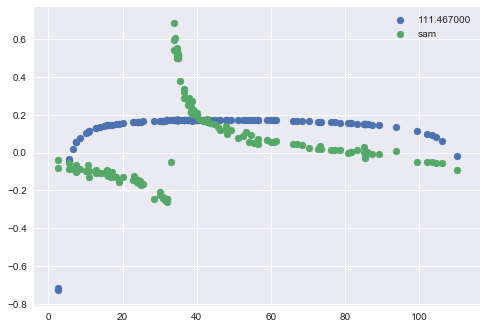

182274.3239477534


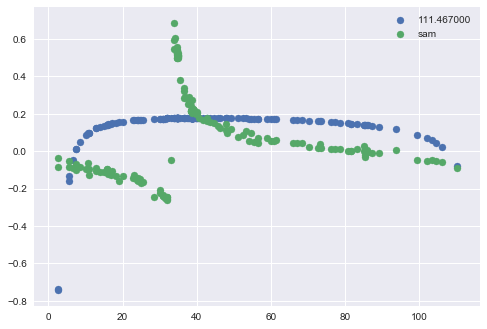

180893.07592618605


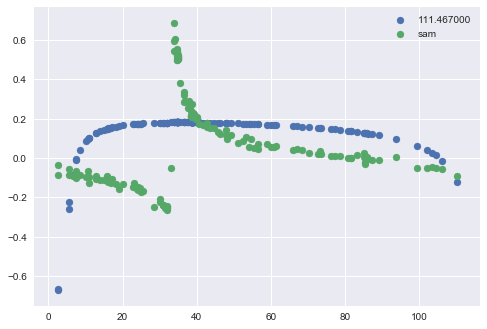

178882.04485827152


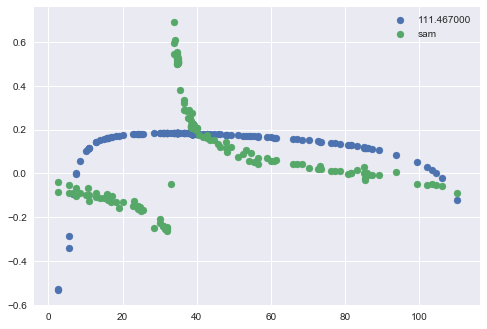

176865.9111986412


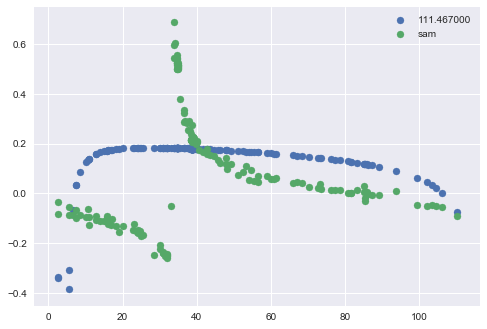

175494.4908724932


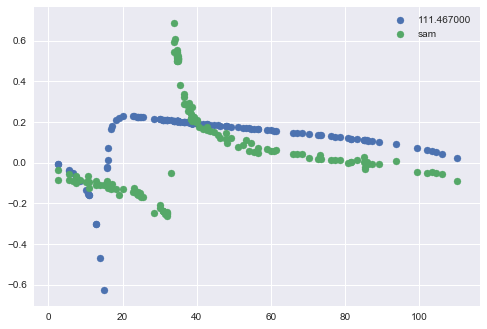

174715.75113213487


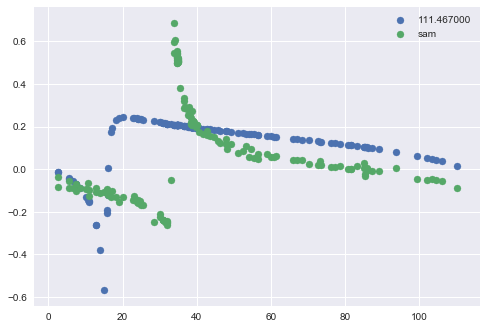

174246.47412020544


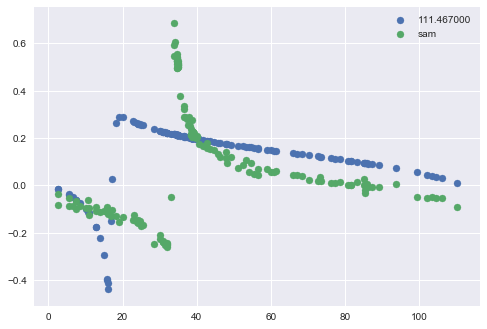

174011.43359930292


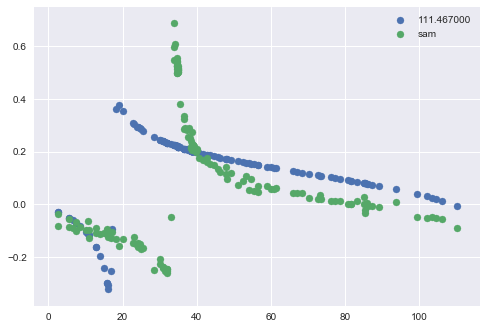

172070.53675661667


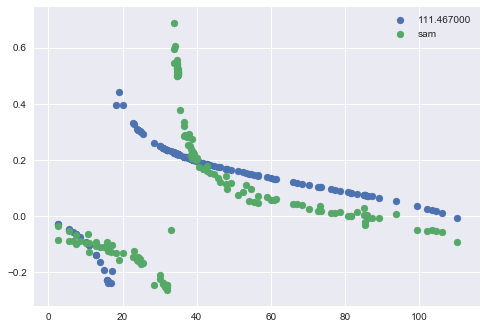

171332.28569859528


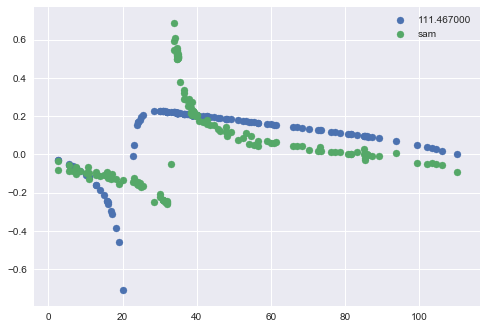

171096.0448613859


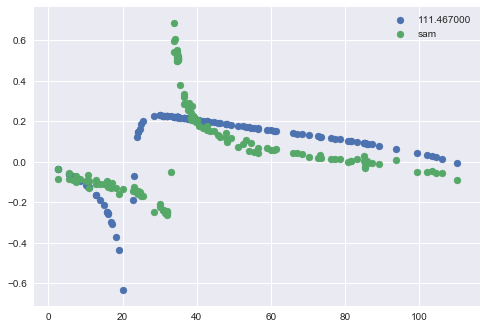

169668.74165597156


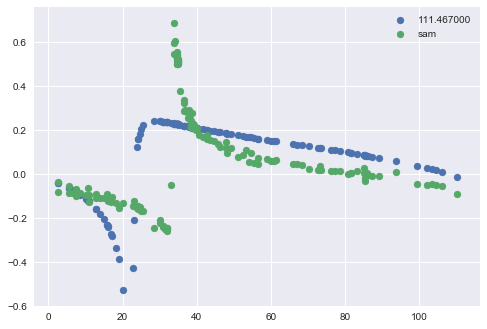

167886.33510828737


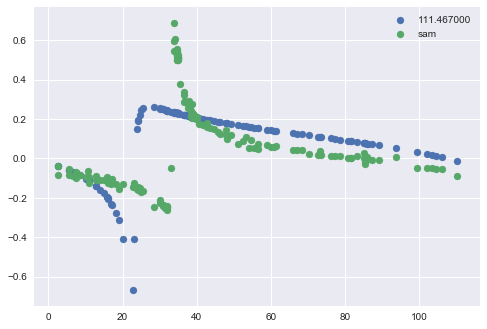

166609.87004174007


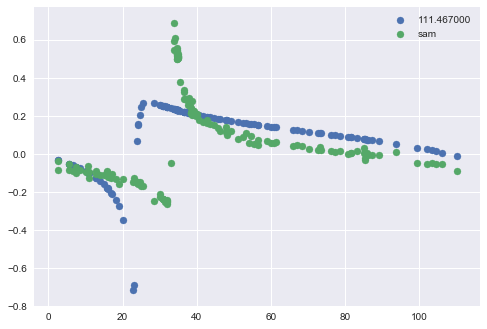

164893.77553125846


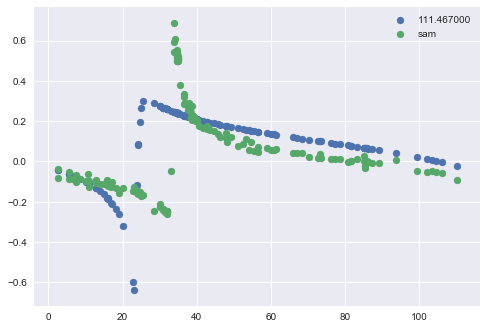

161150.7647721468


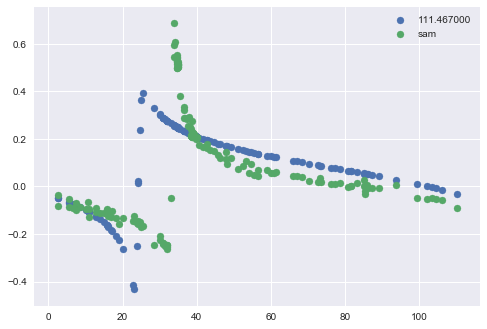

157932.43915648264


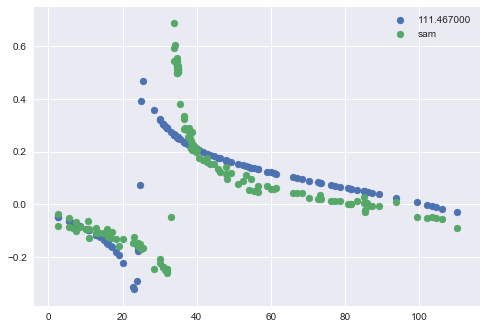

155418.75586801438


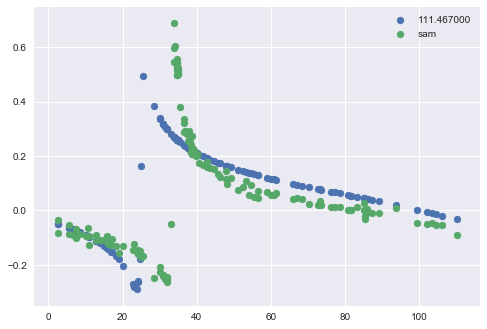

152725.5534900378


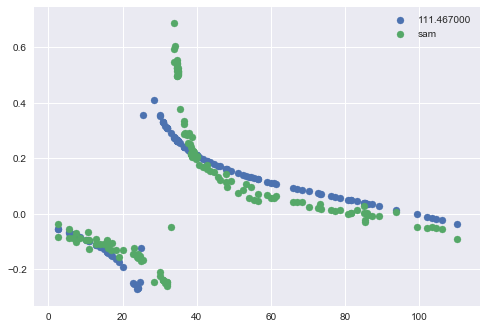

149956.77776144078


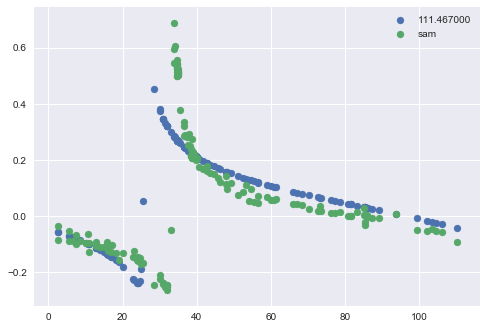

147453.09407473123


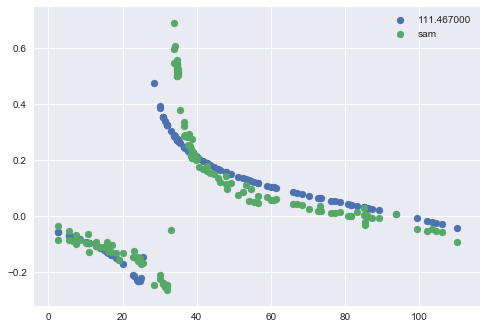

146448.72298058128


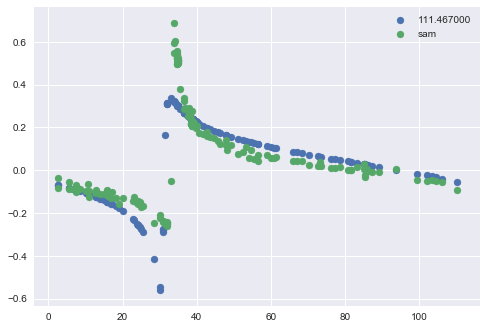

143215.38464894547


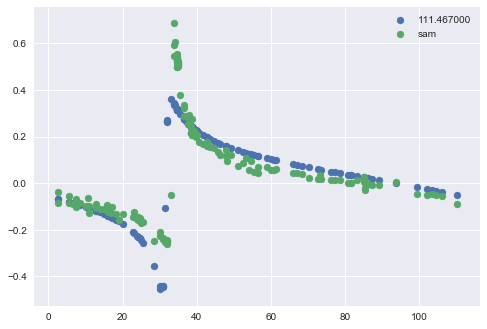

139555.06300701262


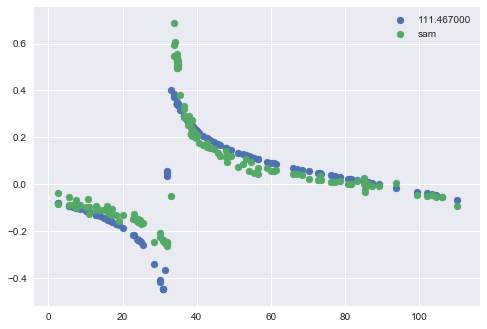

133726.76280299947


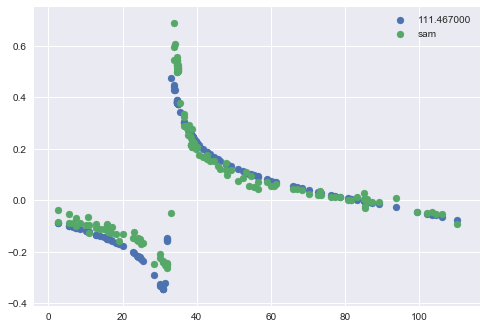

127070.30462257423


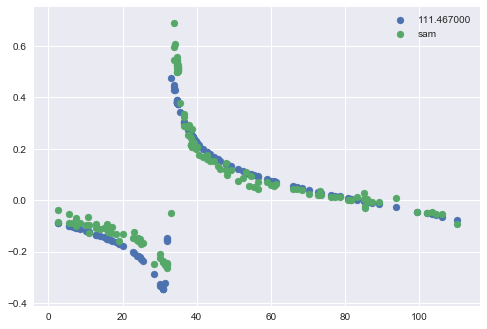

127036.62548794404


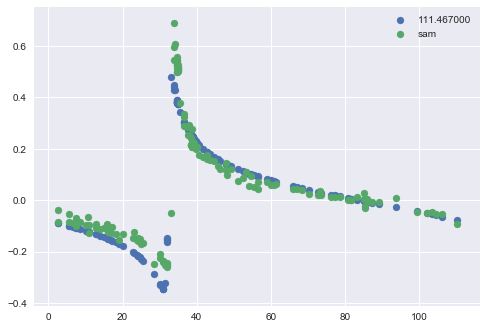

127002.8715080996


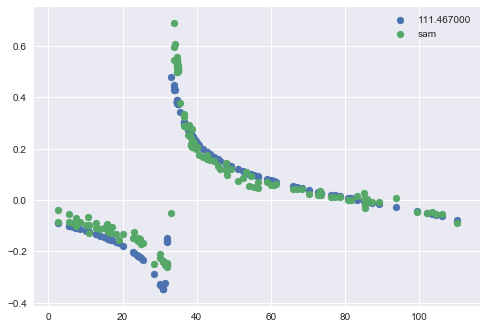

126969.0436055602


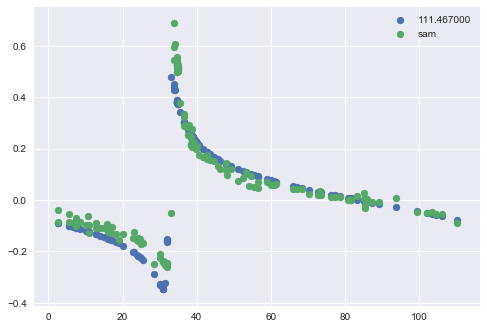

126935.14272958305


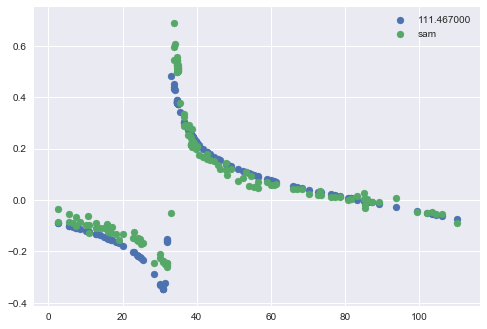

126901.1698564105


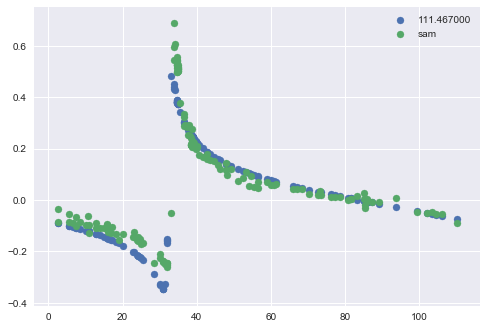

126867.12598950969


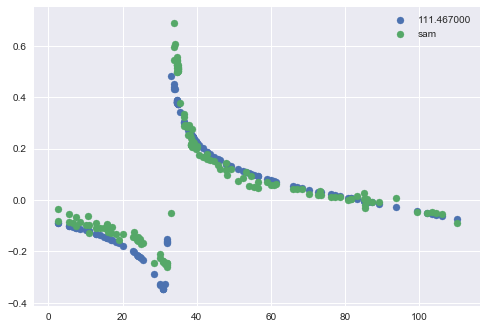

126833.01215980202


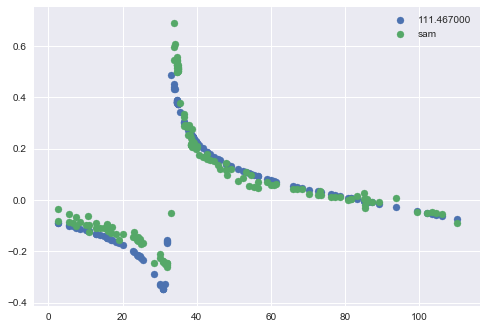

126798.82942588281


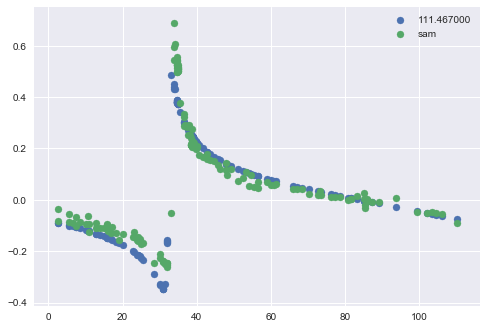

126764.57887423114


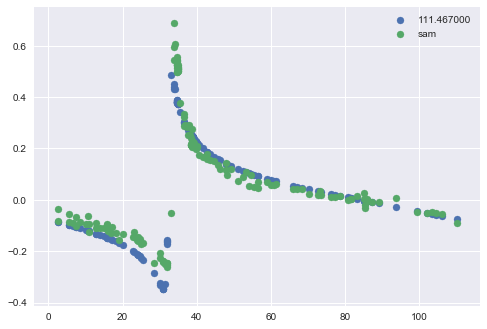

126730.26161940725


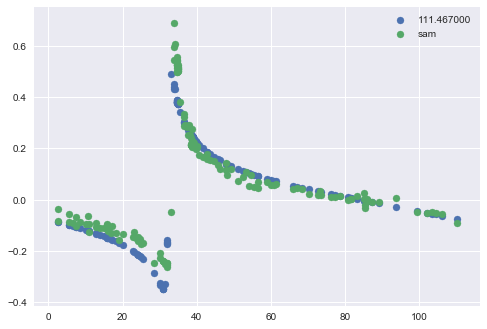

126695.87880424042


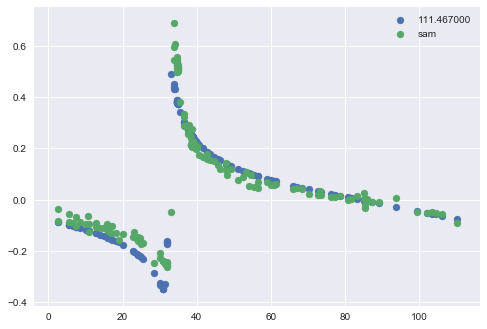

126661.43160000461


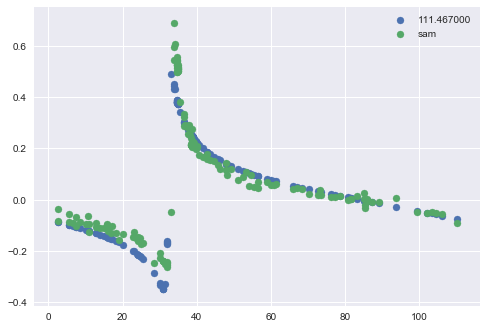

126626.92120658257


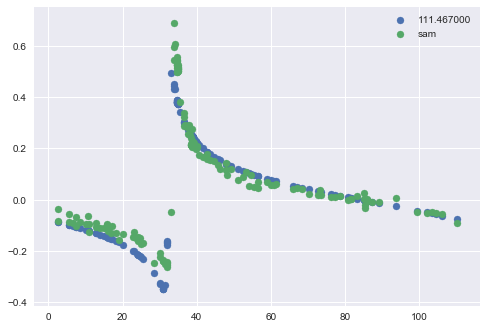

126592.34885261572


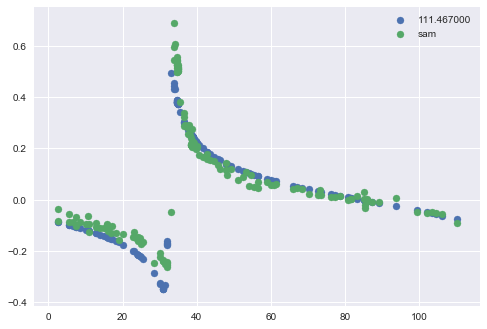

126557.715795644


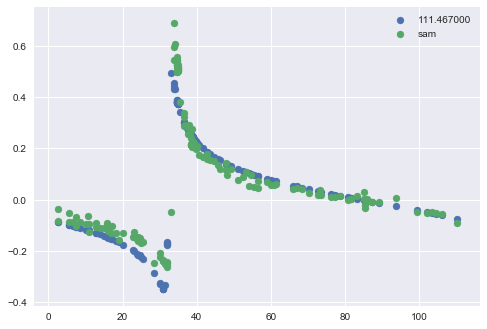

126523.02332222988


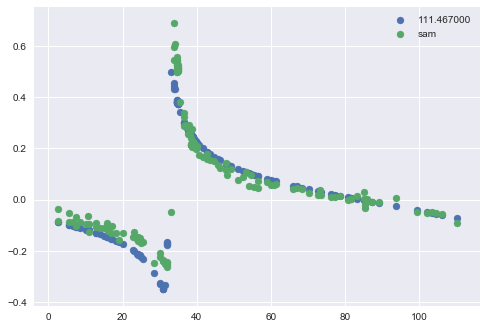

126488.27274807033


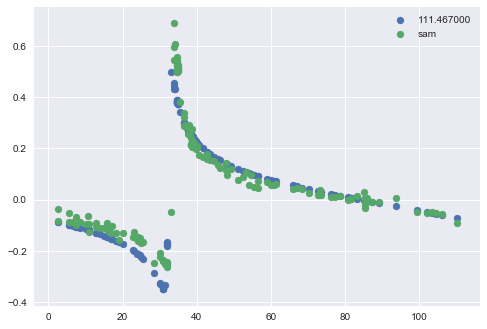

126453.46541809419


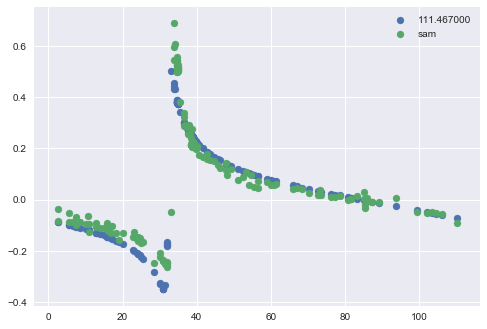

126418.60270654419


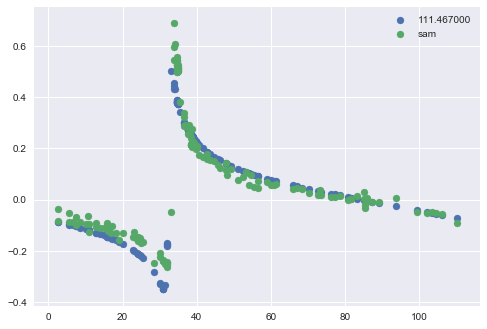

126383.68601704636


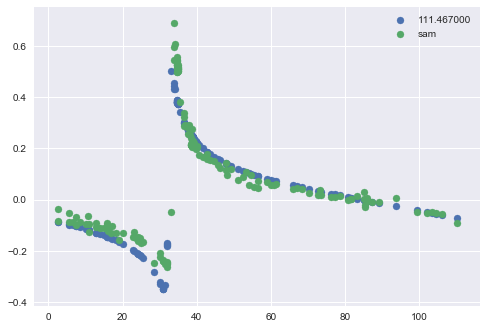

126348.71678266203


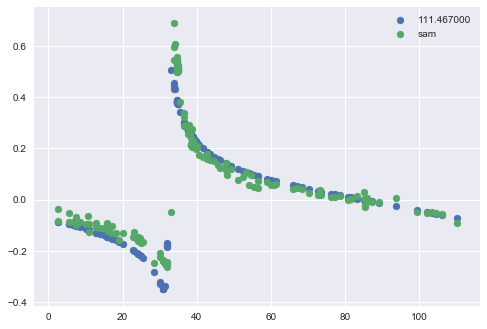

126313.69646592403


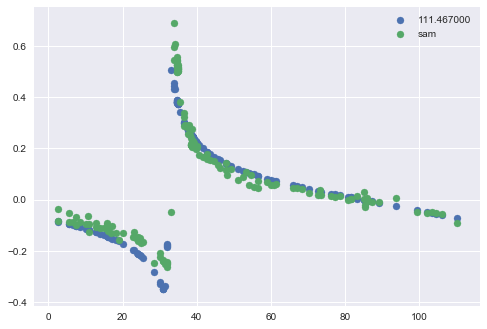

126278.62655886059


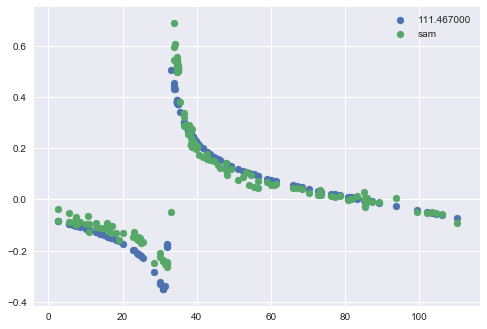

126243.50858299722


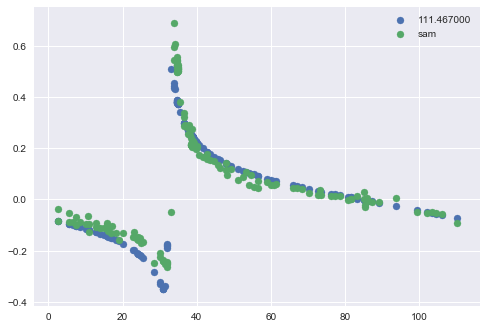

126208.34408934614


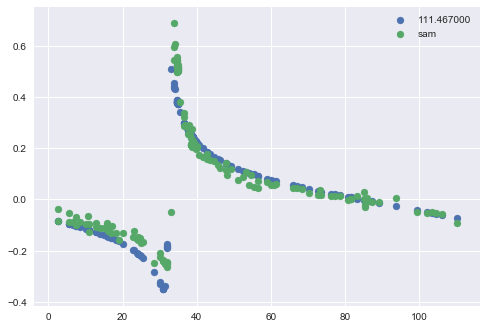

126173.13465837616


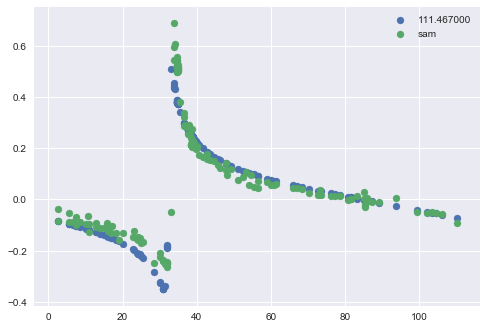

126137.88189996814


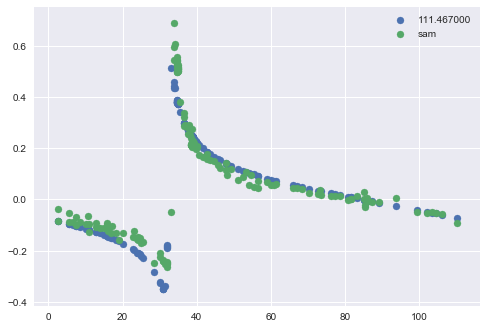

126102.58745334875


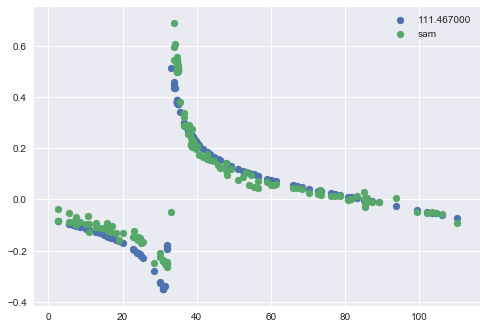

126067.25298700828


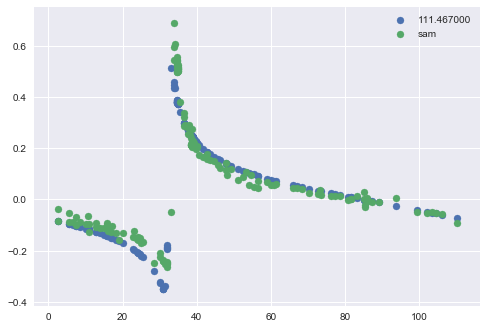

126031.88019860056


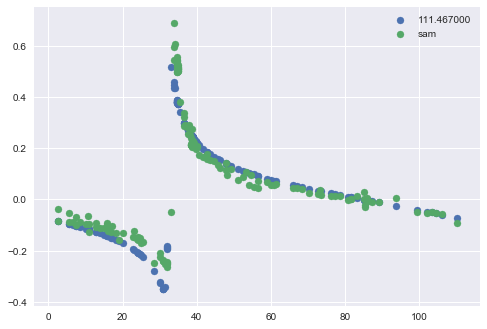

125996.47081482265


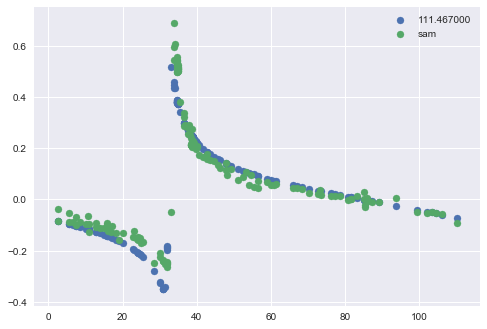

125961.0265912769


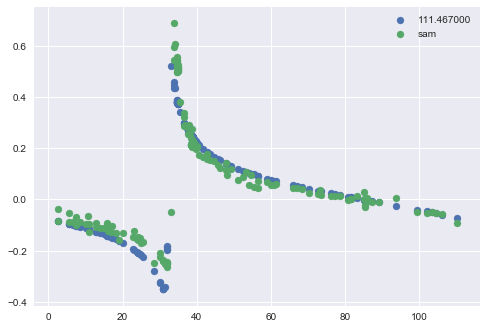

125925.5493123119


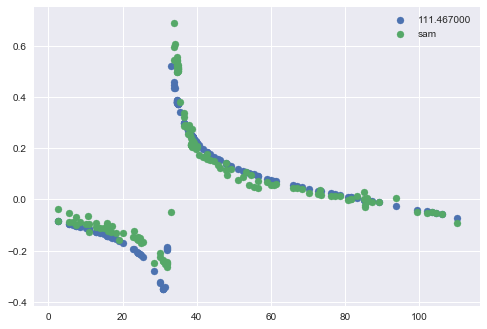

125890.04079084517


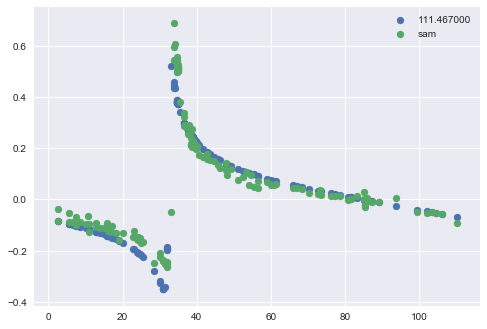

125854.50286816689


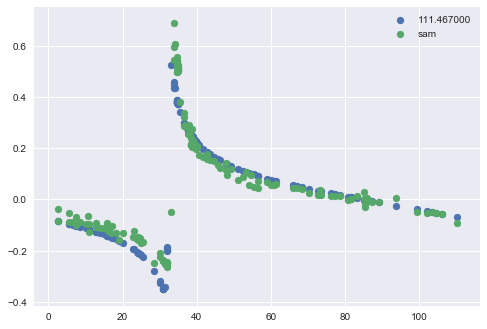

125818.93741372082


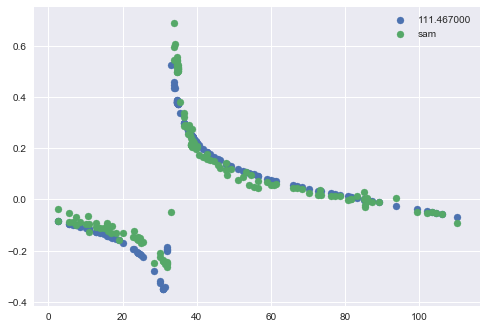

125783.34632486764


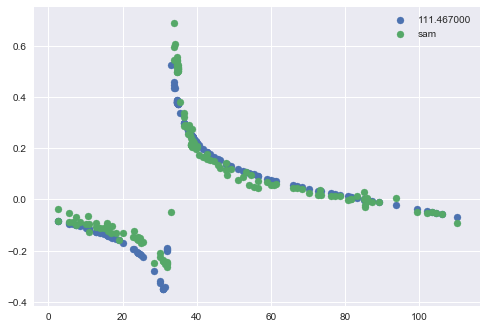

125747.7315266254


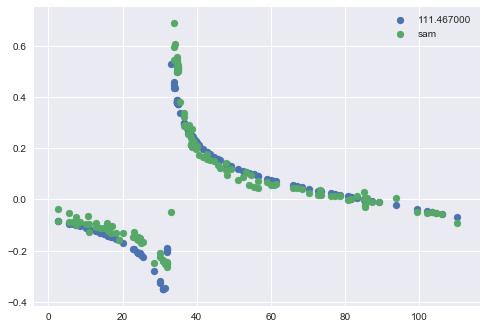

125712.09497139175


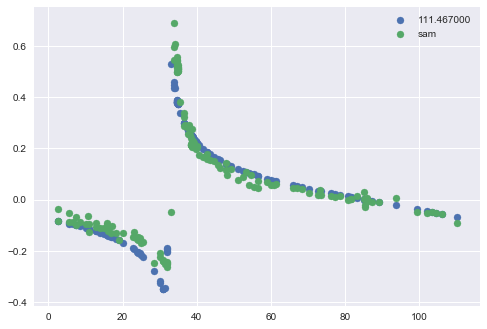

125676.43863864301


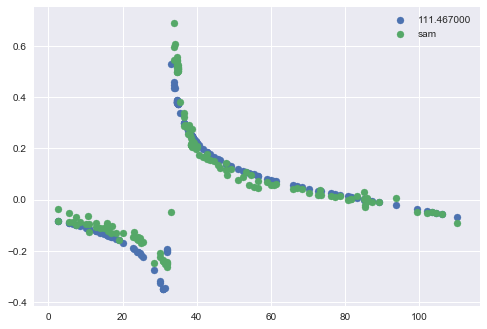

125640.76453461297


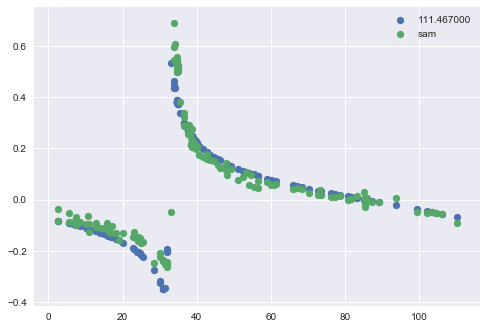

125605.07469195155


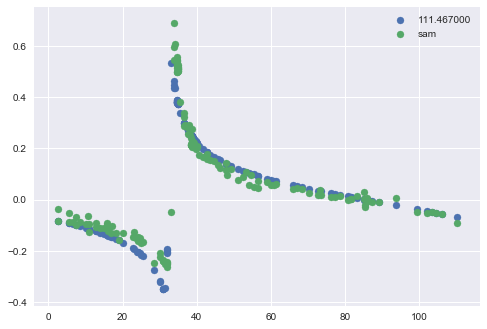

125569.37116935986


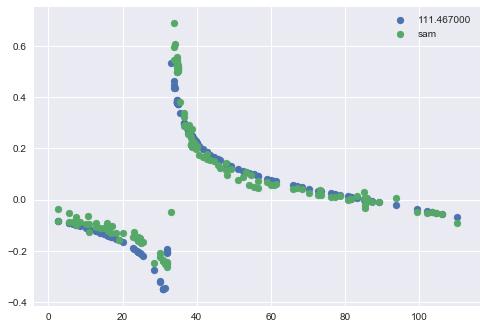

125533.65605120725


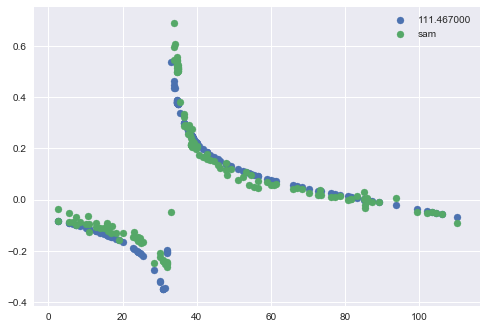

125497.93144712134


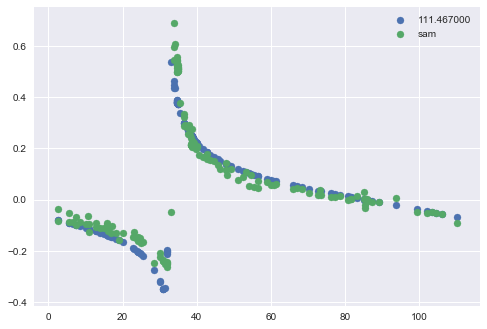

125462.19949156354


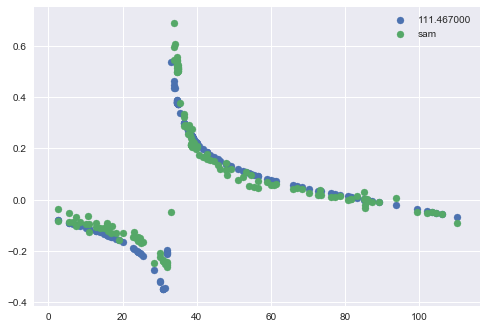

125426.4623433768


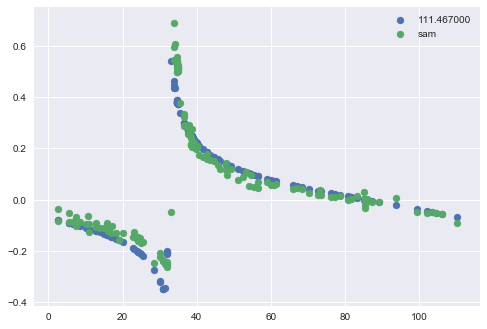

125390.72218531354


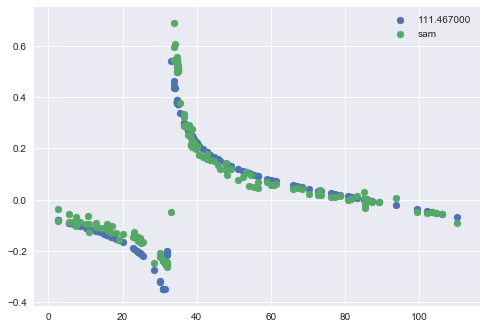

125354.98122354528


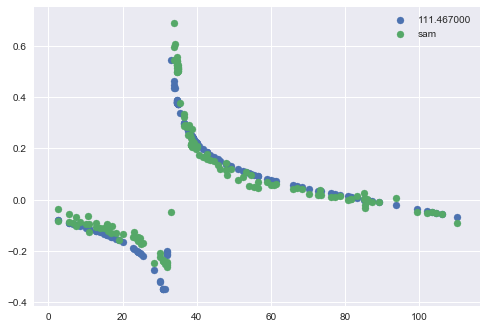

125319.24168714514


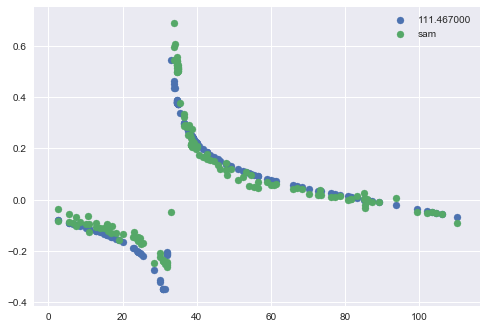

125283.50582755257


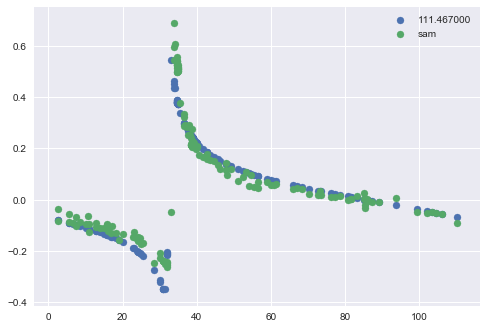

125247.77591801509


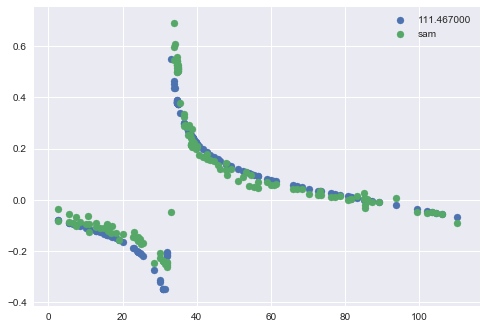

125212.05425300705


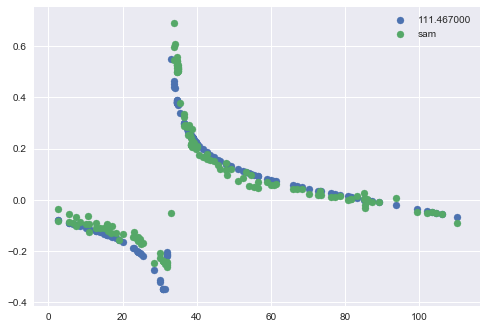

125176.34314763252


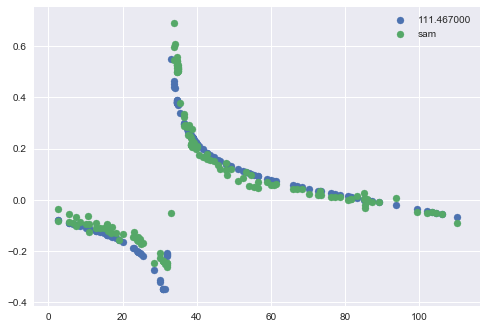

125140.6449369992


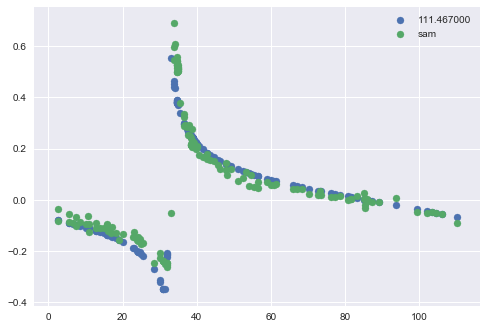

125104.96197557743


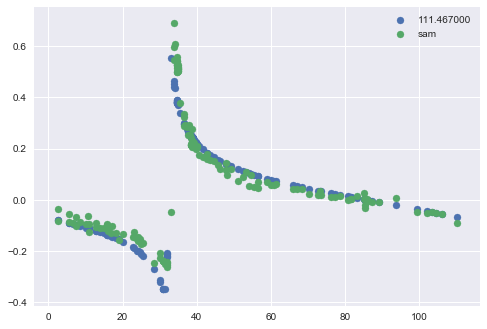

125069.29663653573


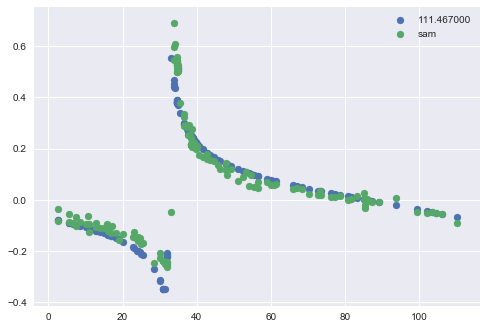

125033.65131105538


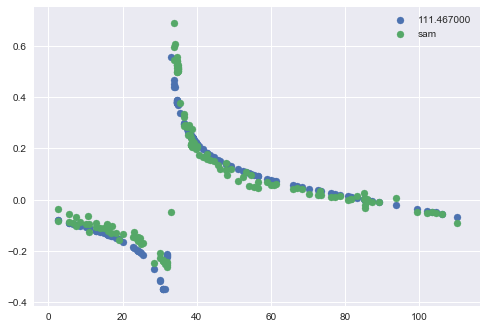

124998.02840762492


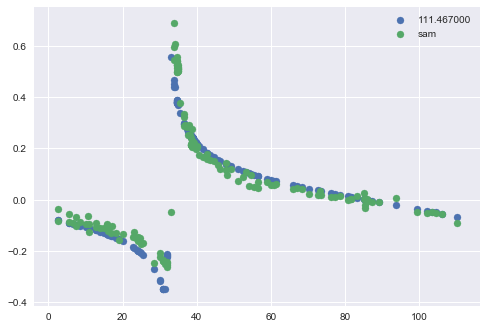

124962.43035131619


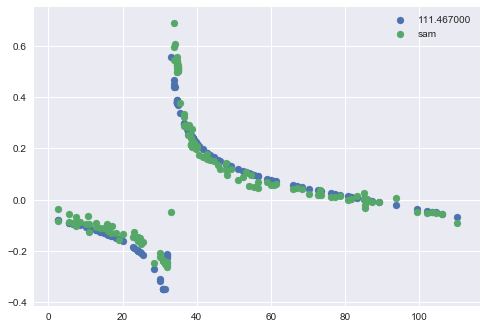

124926.85958303779


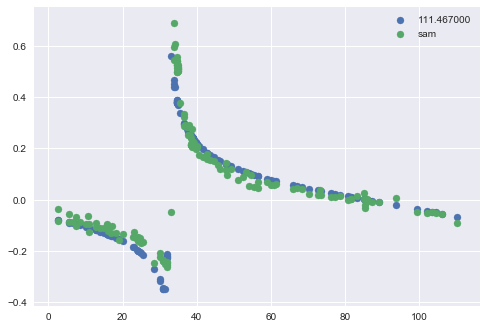

124891.31855876914


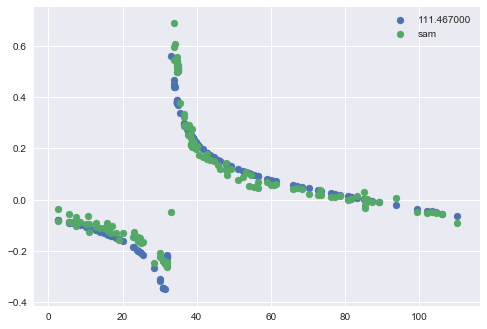

124855.80974877854


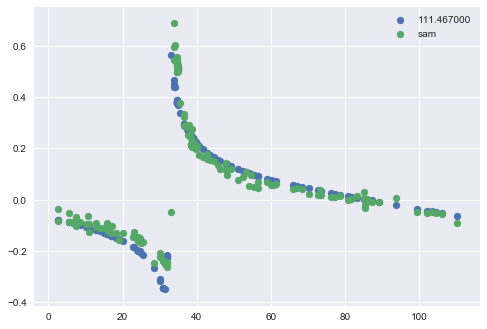

124820.33563681757


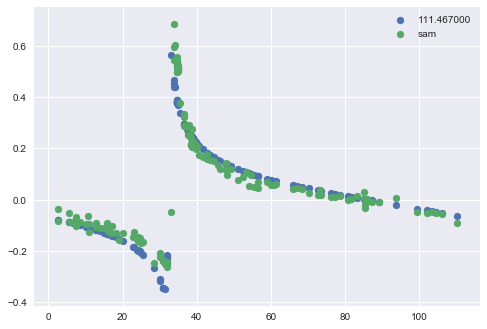

124784.89871930034


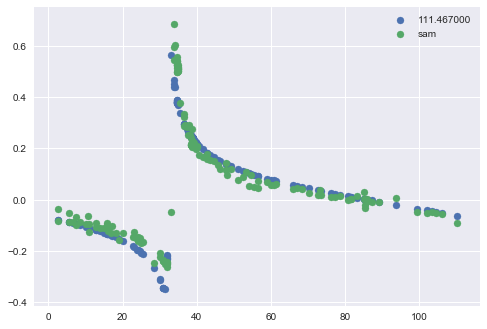

124749.50150446345


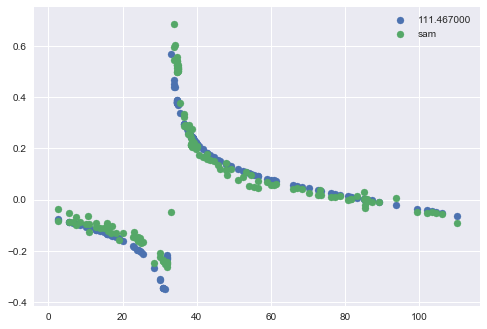

124714.14651150863


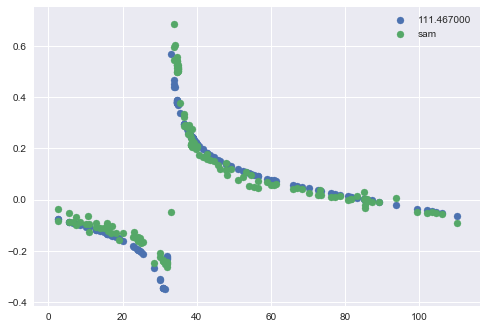

124678.83626972725


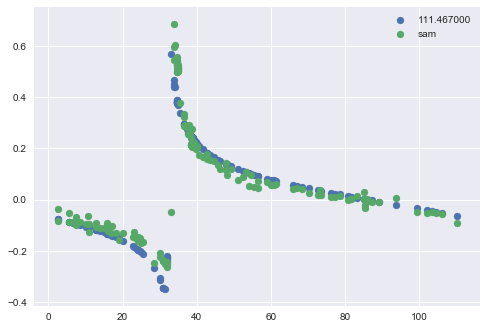

124643.57331760837


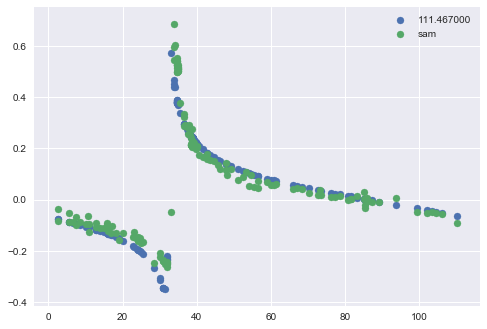

124608.36020193178


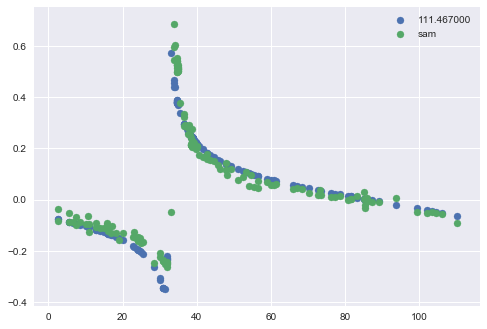

124573.1994768432


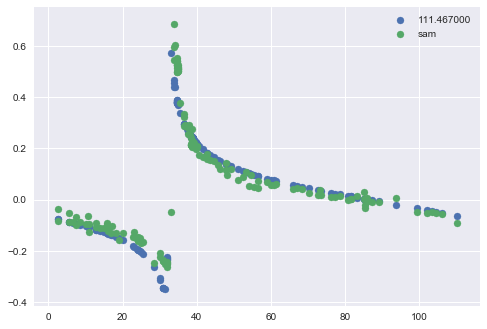

124538.09370291646


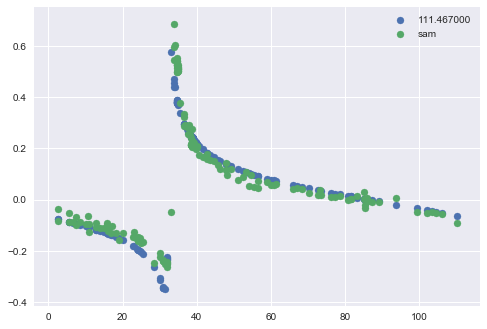

124503.04544619883


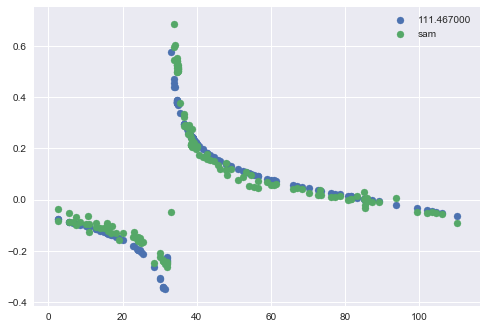

124468.0572772444


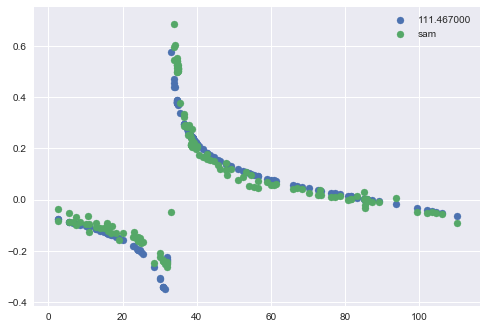

124433.13177013393


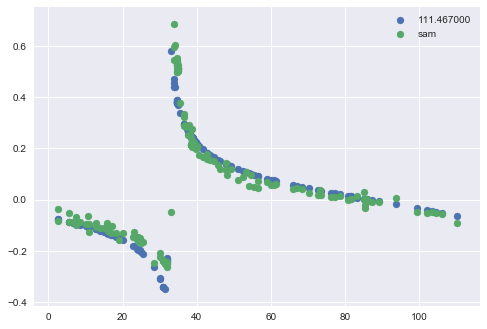

124398.2715014792


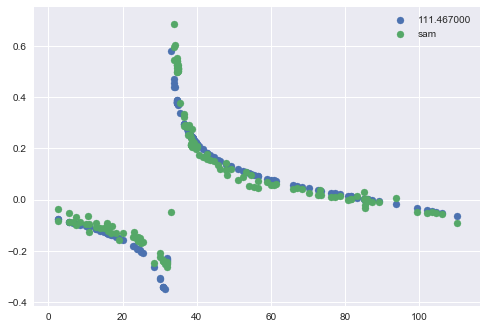

124363.47904941859


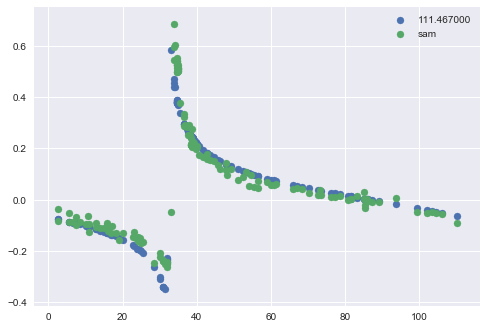

124328.7569926019


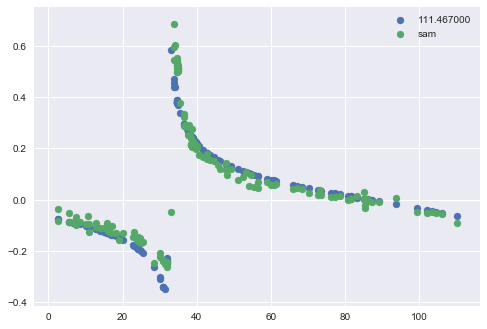

124294.10790915933


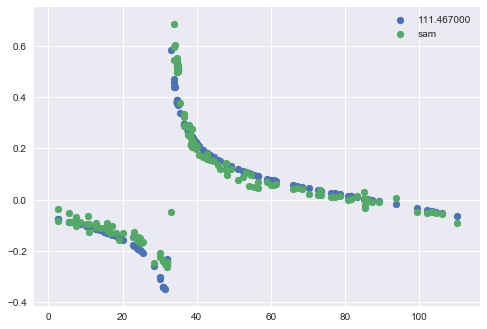

124259.53437566699


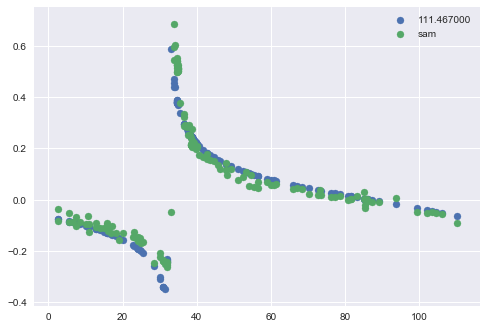

124225.03896609895


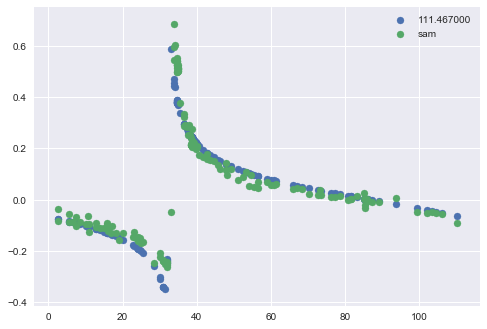

124190.62425077258


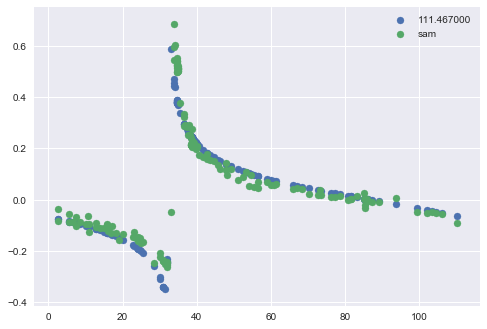

124156.29279528695


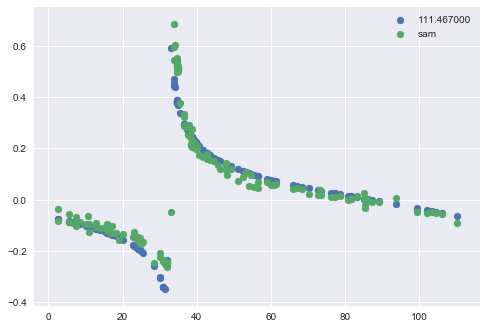

124122.04715945217


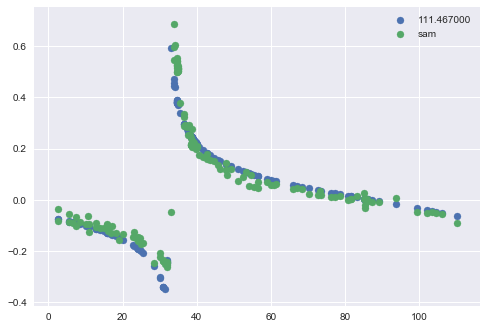

124087.88989621538


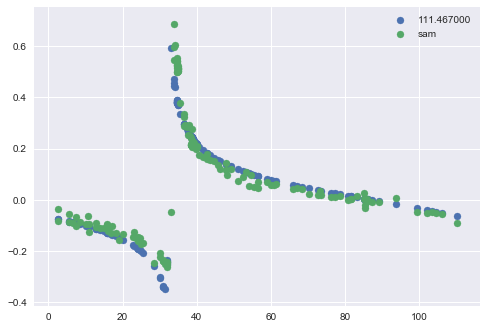

124053.82355058071


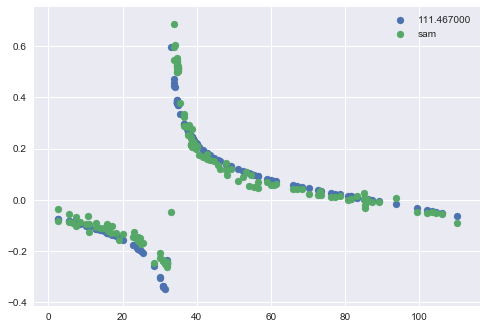

124019.85065852516


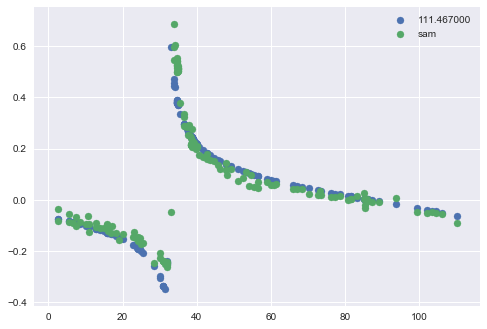

123985.97374590965


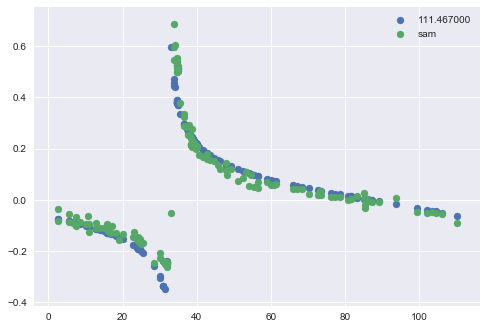

123952.19532739164


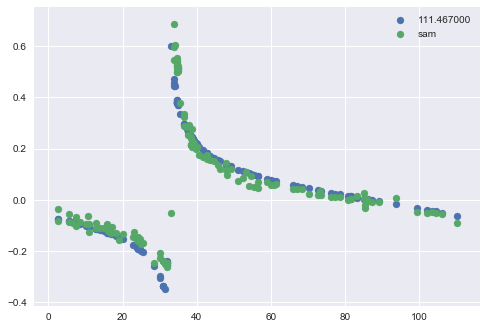

123918.51791257206


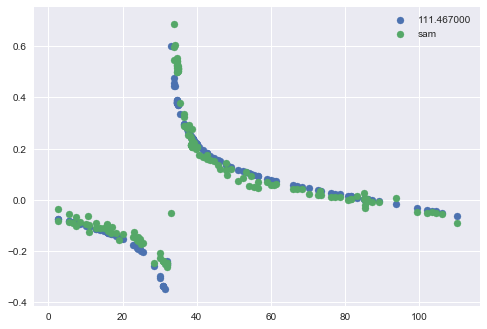

123884.94397607501


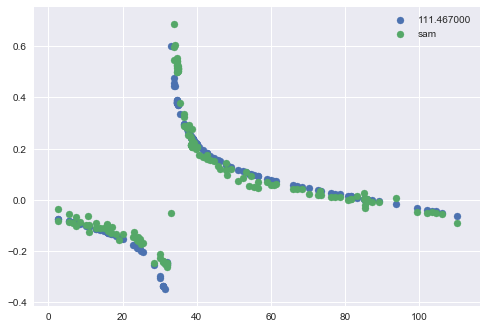

123851.47599949622


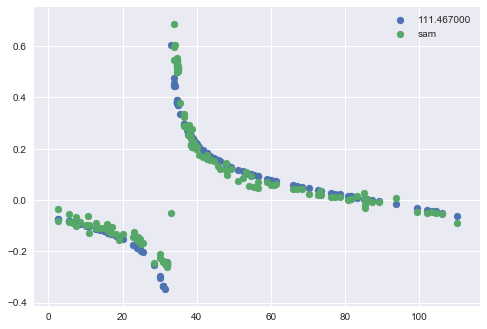

123818.1164417579


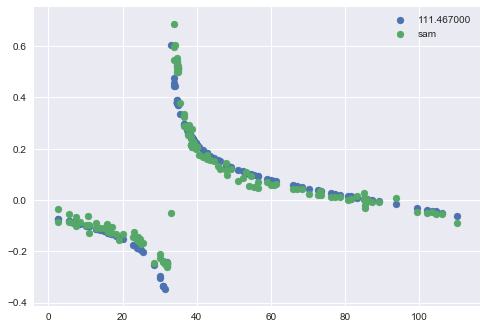

123784.86774512319


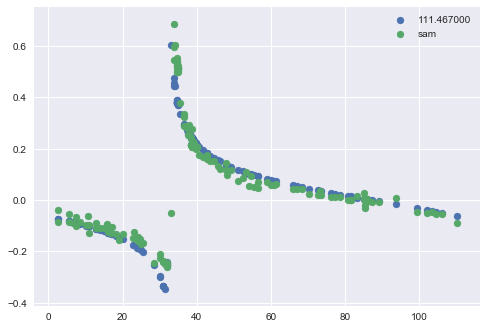

123751.73233411391


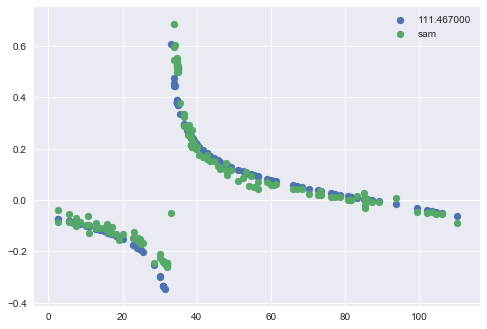

123718.71261442745


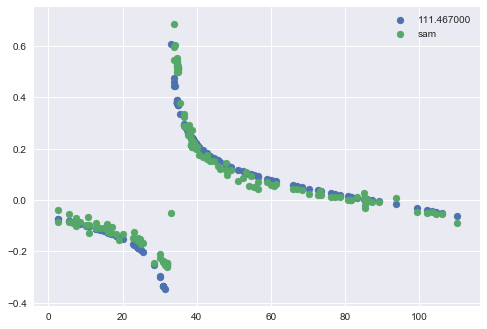

123685.81097186389


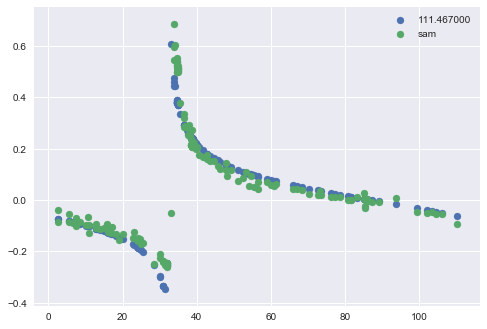

123653.0297712537


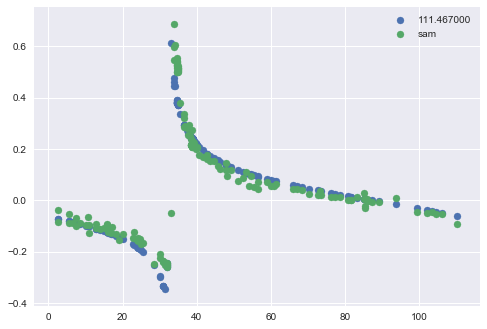

123620.3713554004


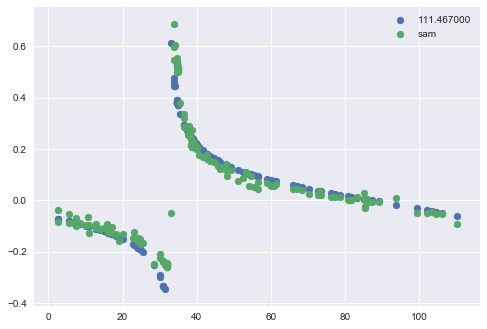

123587.83804402128


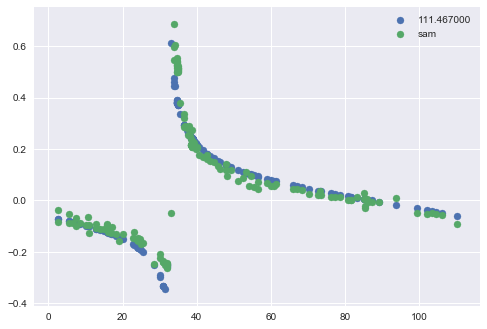

123555.4321327077


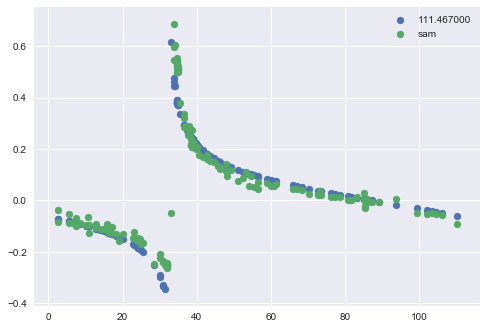

123523.15589188709


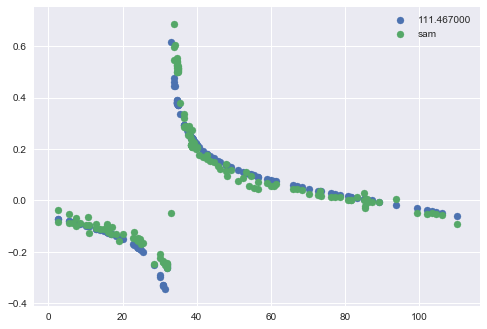

123491.01156580071


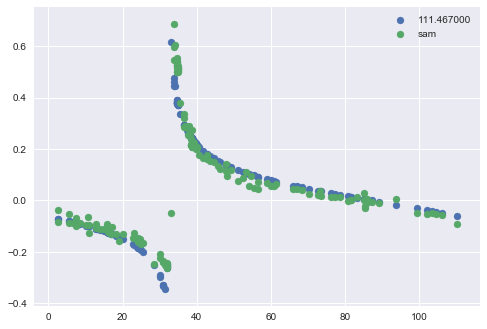

123459.0013714928


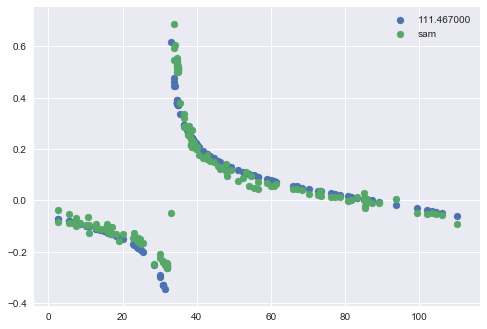

123427.1274978114


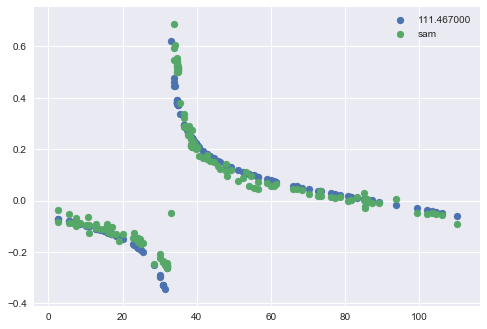

123395.39210442454


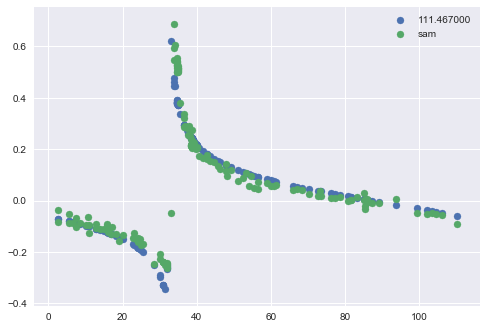

123363.79732085038


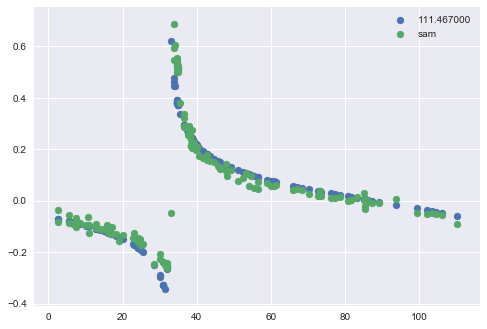

123332.3452455046


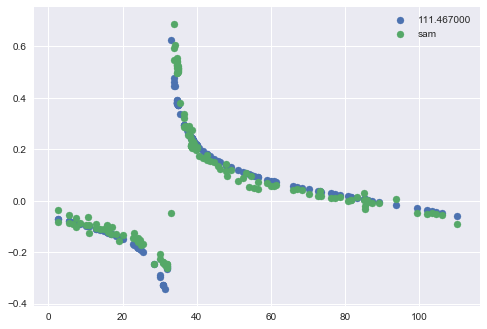

123301.03794476372


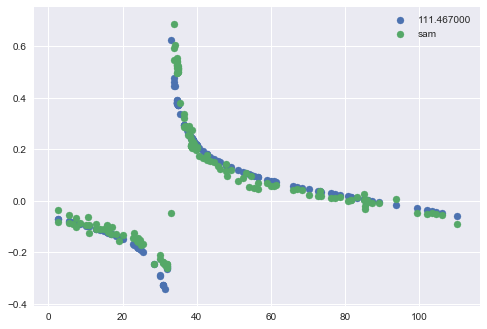

123269.87745204655


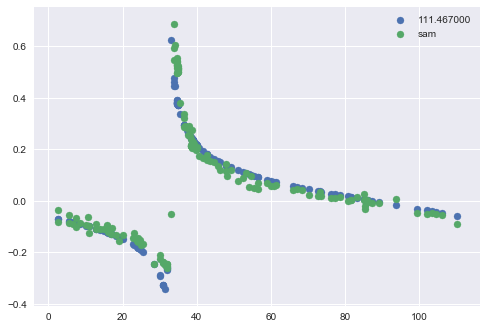

123238.86576691584


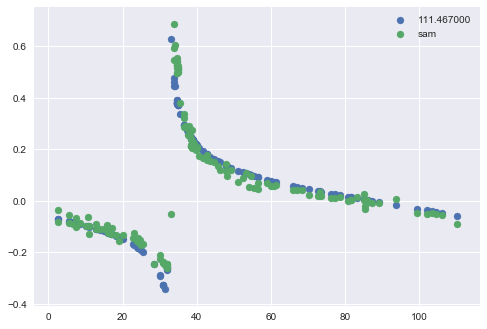

123208.0048541945


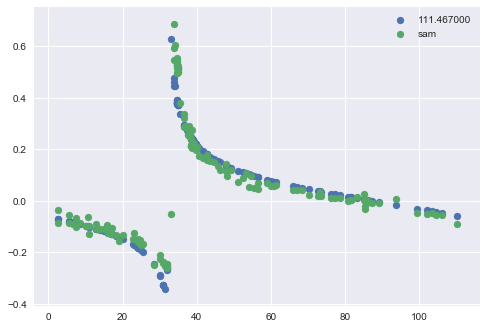

123177.29664311018


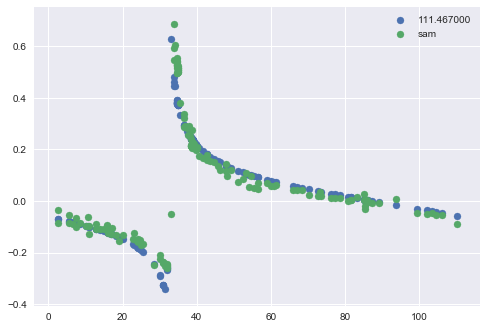

123146.74302645557


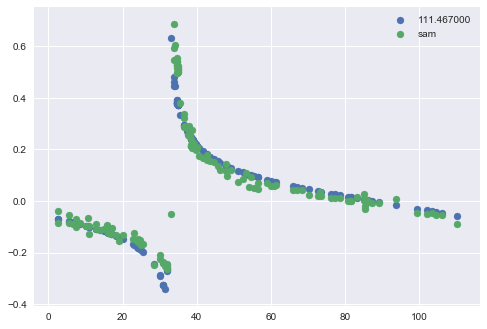

123116.3458597713


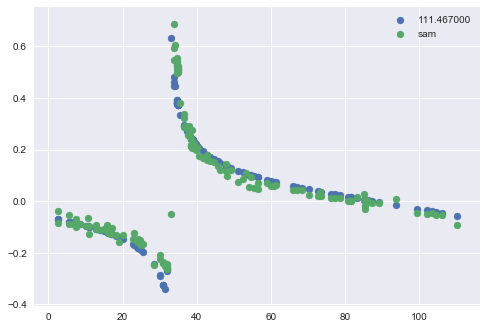

123086.10696055593


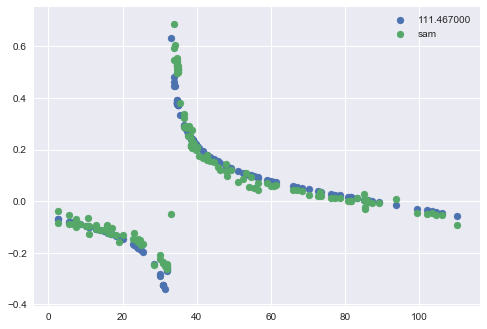

123056.02810749633


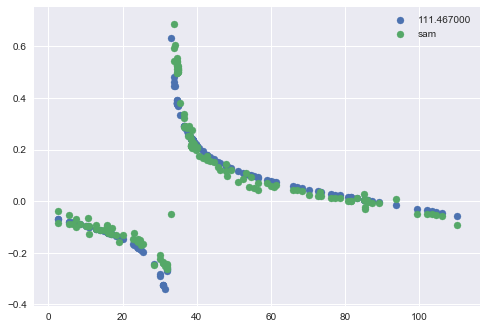

123026.11103972213


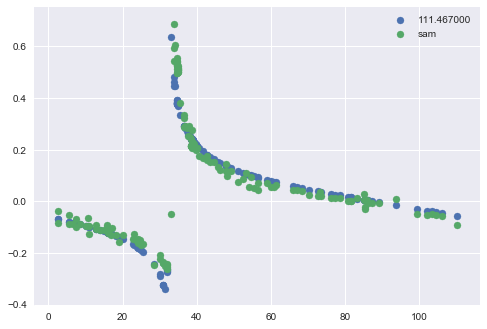

122996.35745609115


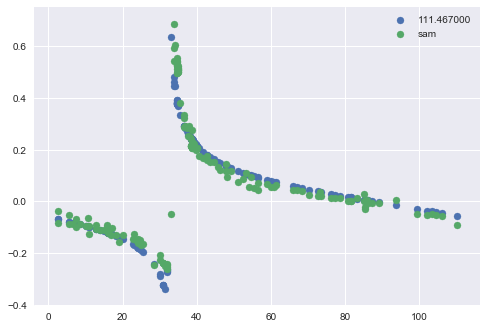

122966.76901449374


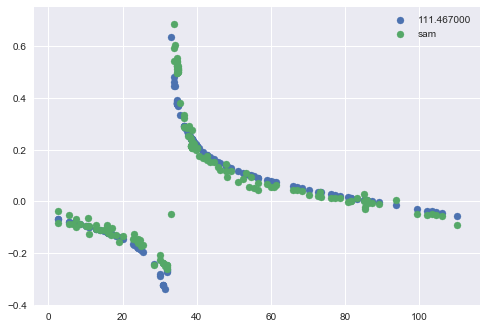

122937.34733118926


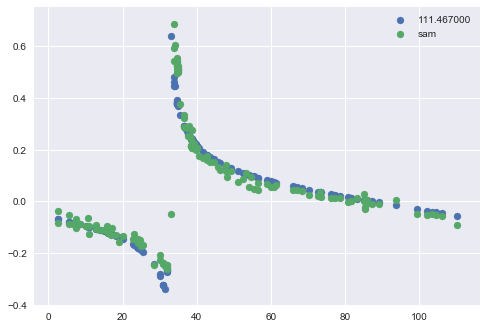

122908.09398016997


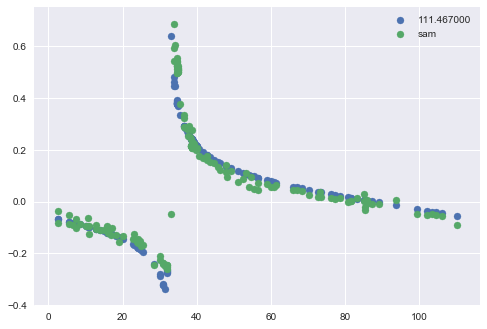

122879.01049255059


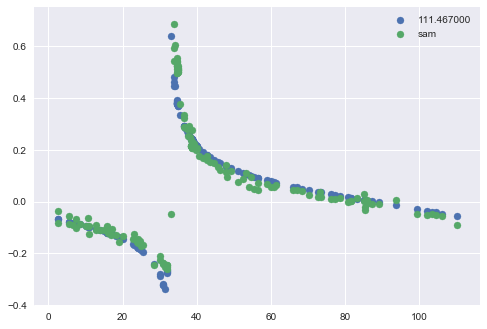

122850.09835598737


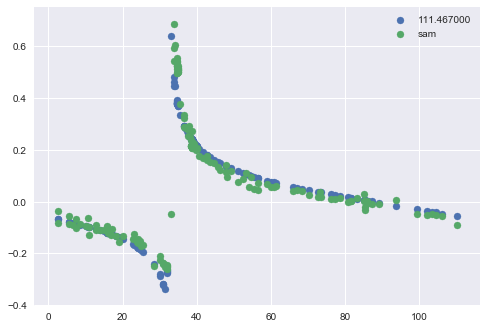

122821.35901413107


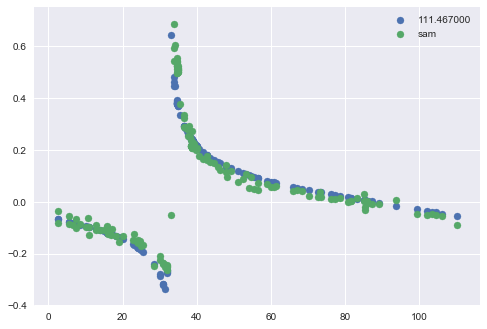

122792.79386610405


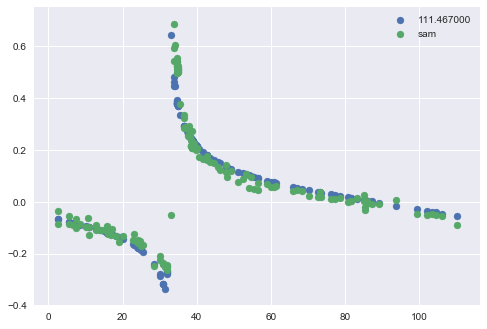

122764.40426601112


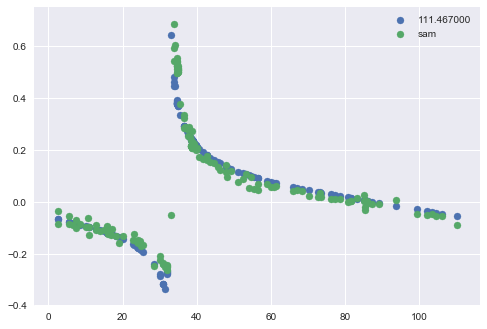

122736.19152248136


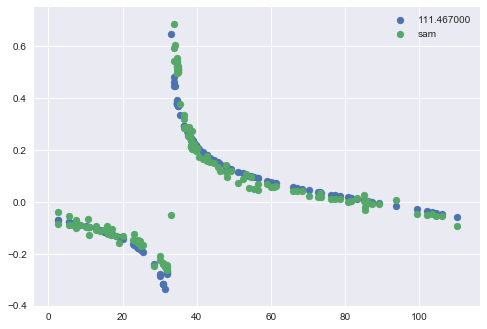

122708.15689824296


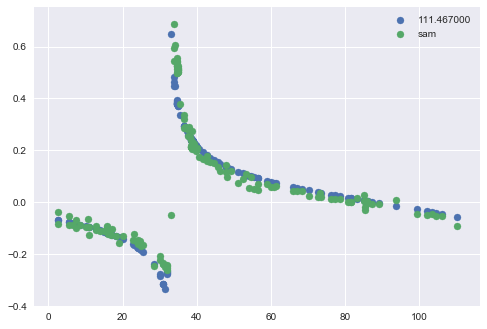

122680.30160972796


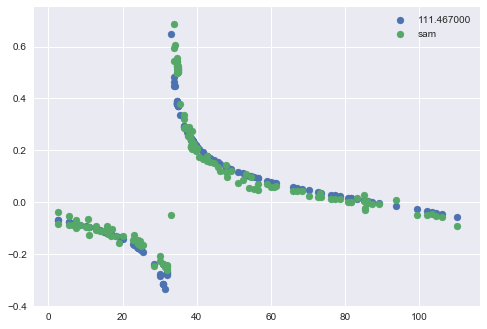

122652.62682670736


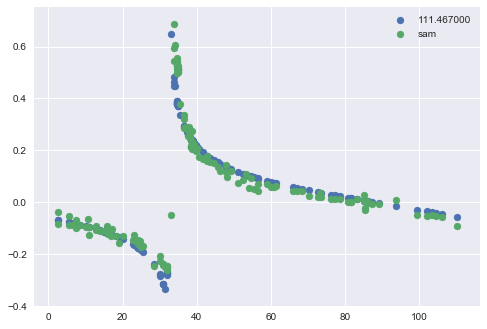

122625.1336719663


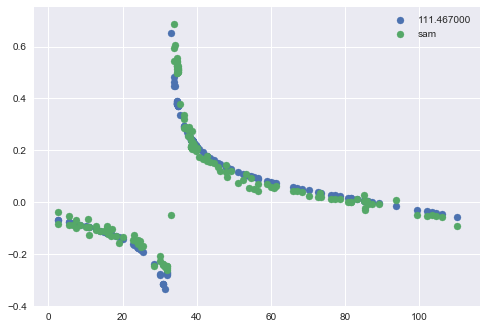

122597.82322100487


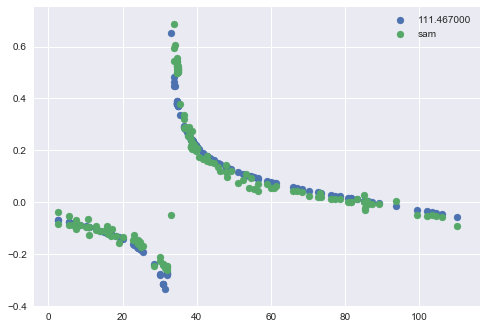

122570.69650177586


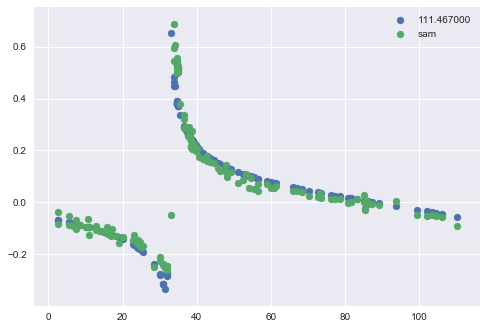

122543.75449445713


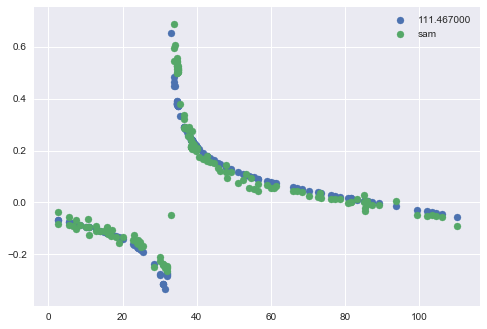

122516.99813125297


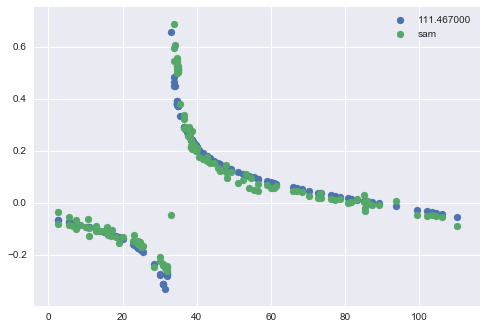

122490.42829623882


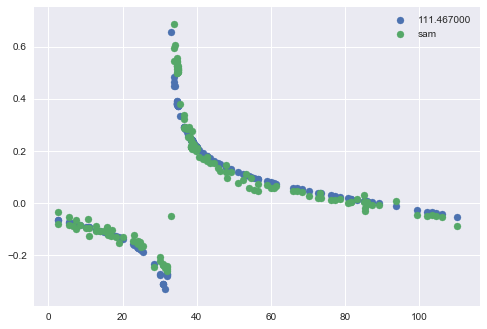

122464.04582522542


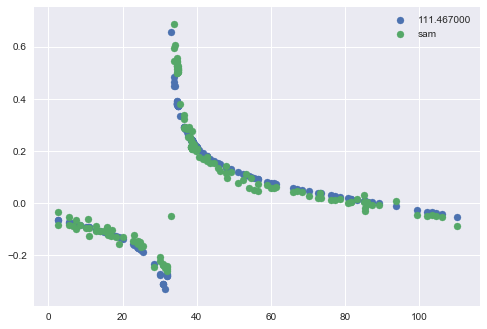

122437.85150567217


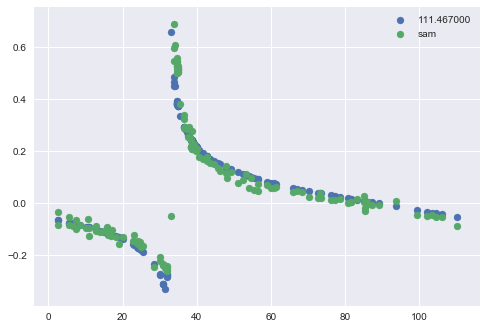

122411.84607662805


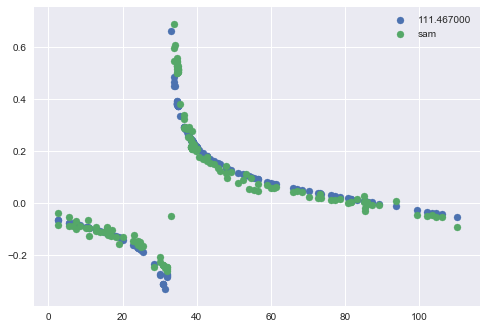

122386.03022870125


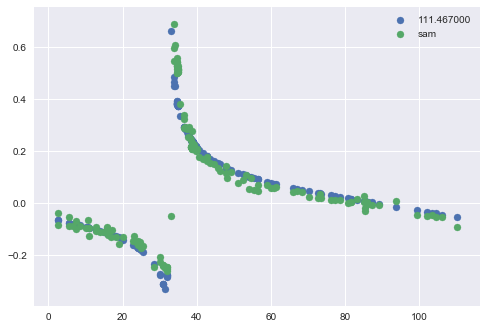

122360.40460407203


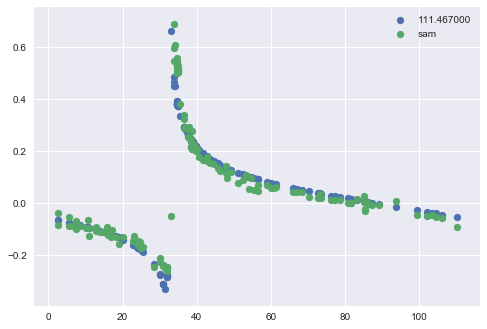

122334.96979653643


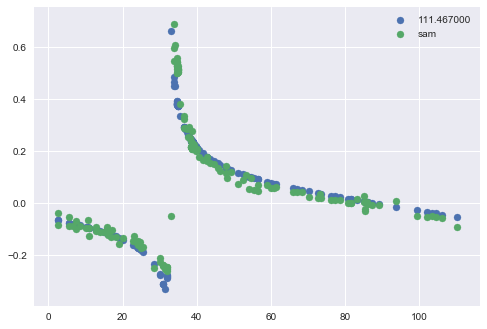

122309.72635158131


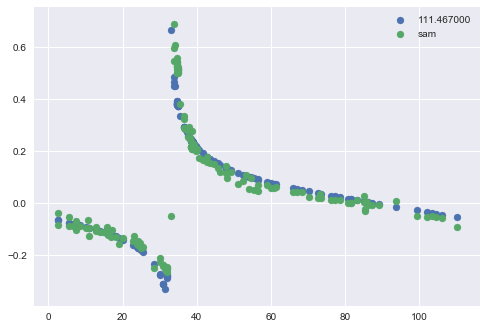

122284.67476649376


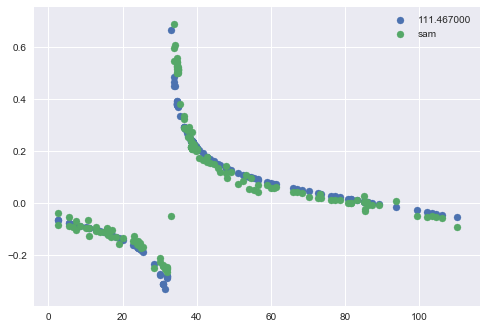

122259.81549050605


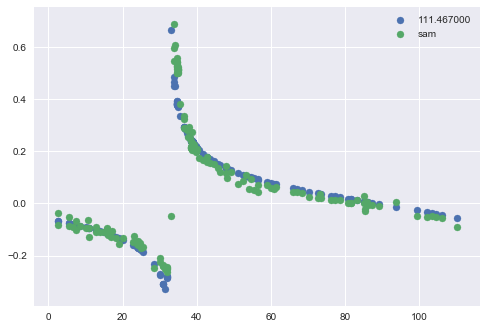

122235.14892497267


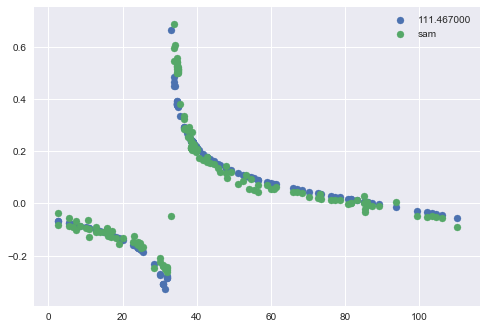

122210.67542357743


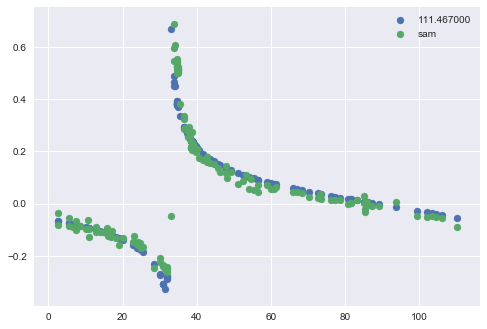

122186.39529257672


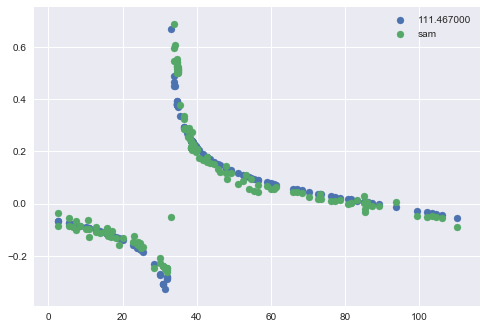

122162.30879107038


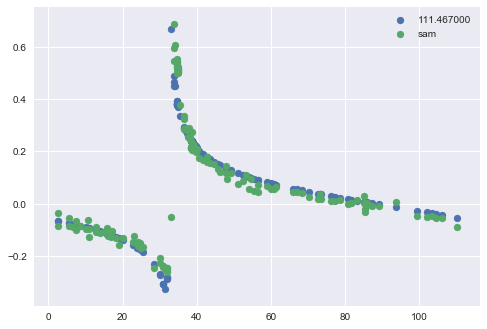

122138.41613131293


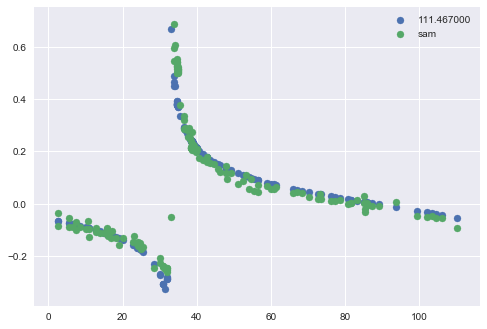

122114.71747904121


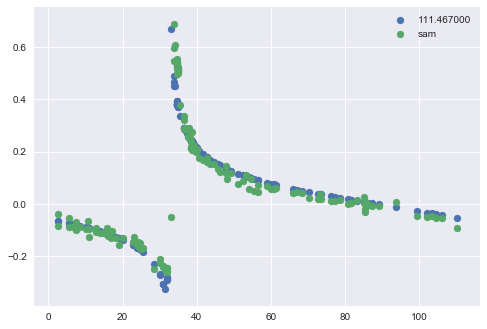

122091.21295384507


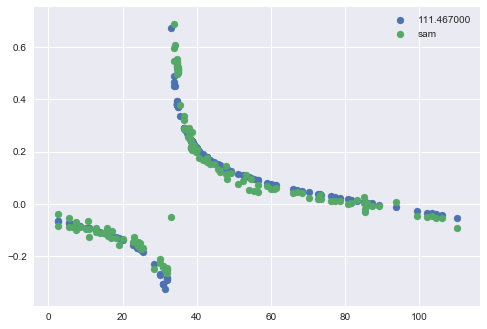

122067.90262956236


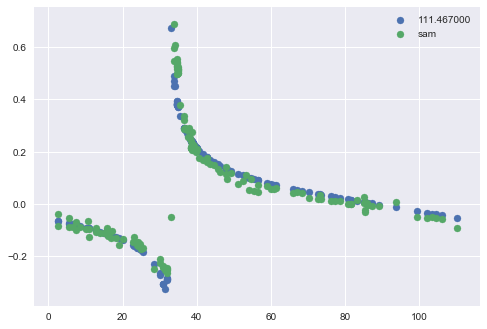

122044.7865347064


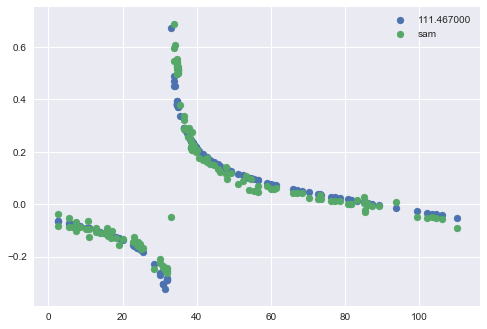

122021.86465291669


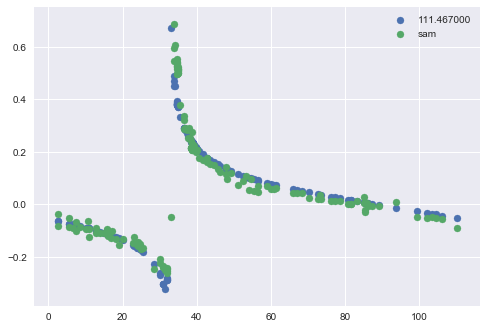

121999.136923442


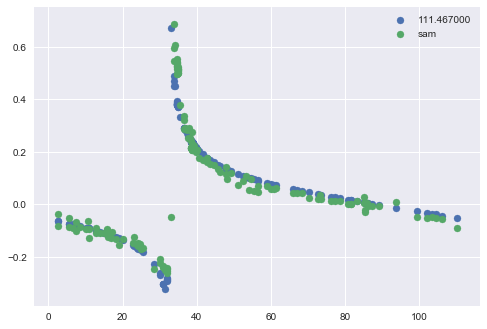

121976.60324164903


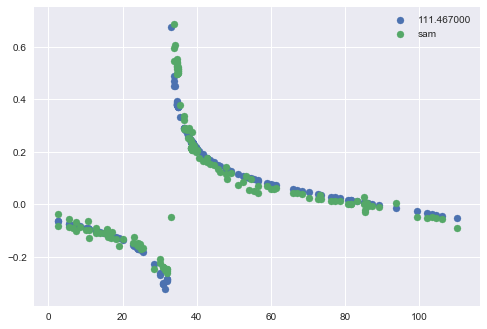

121954.2634595607


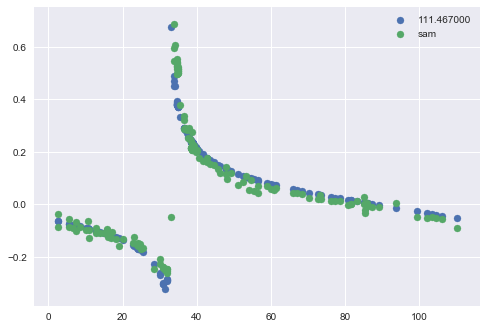

121932.1173864138


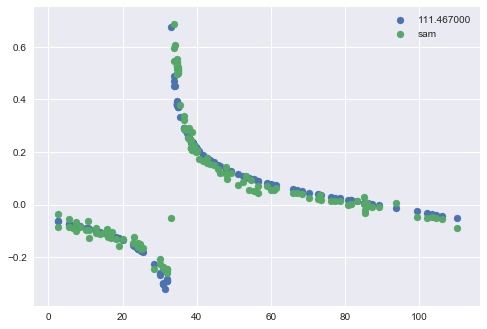

121910.16478924514


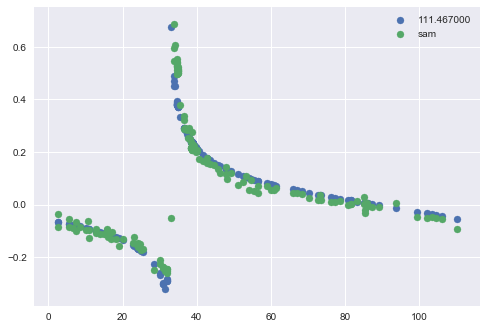

121888.40539350695


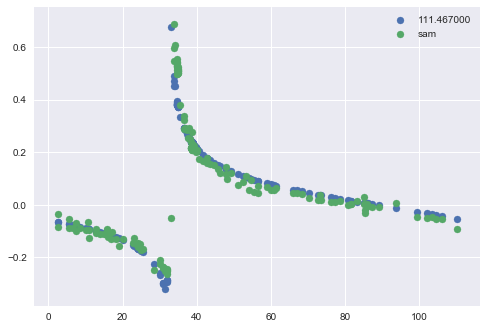

121866.83888369126


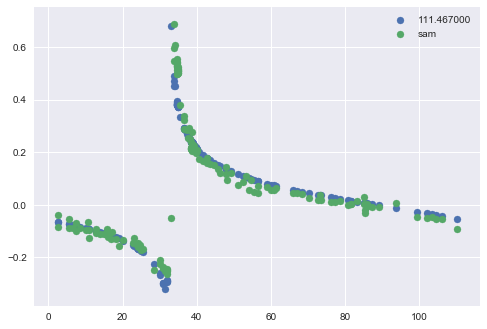

121845.46490399684


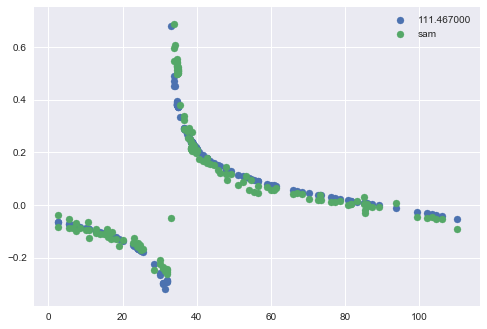

121824.28305899556


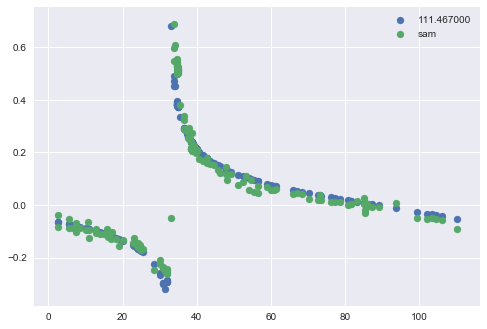

121803.29291434021


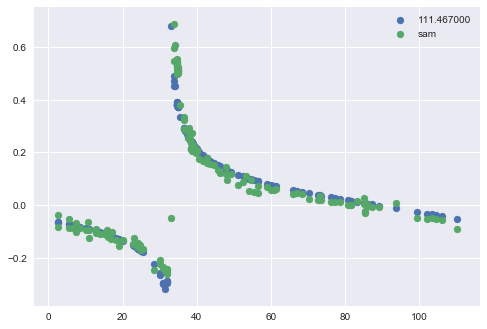

121782.49399747222


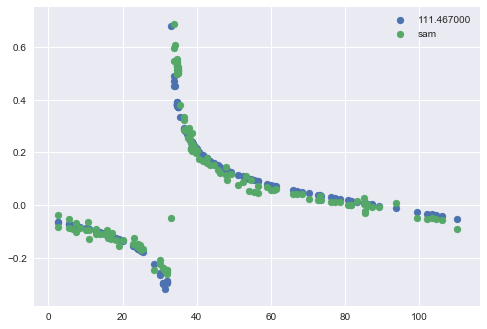

121761.88579836566


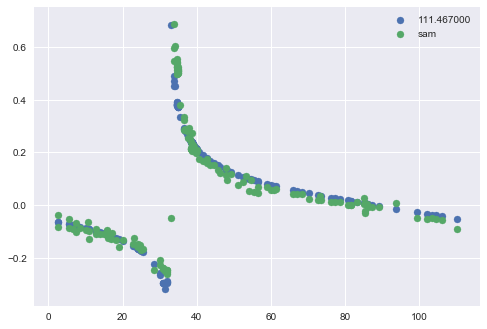

121741.46777027802


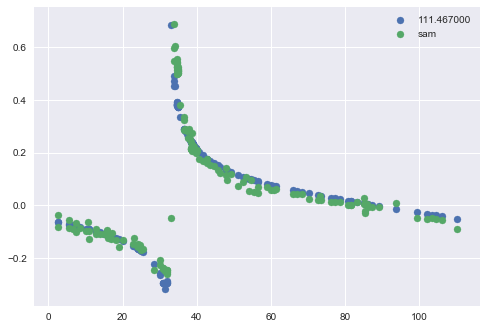

121721.23933052018


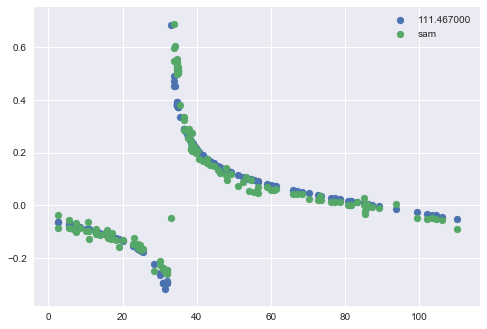

121701.19986123836


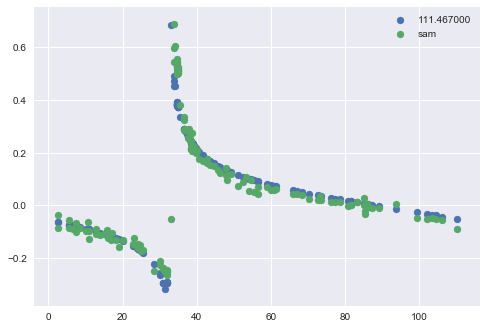

121681.34871022533


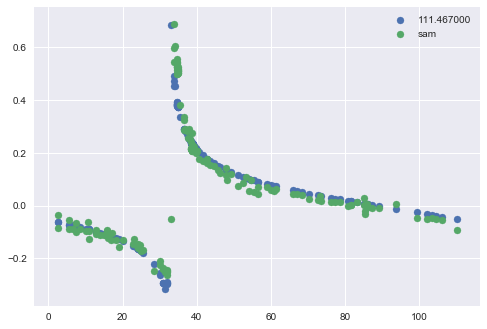

121661.6851917278


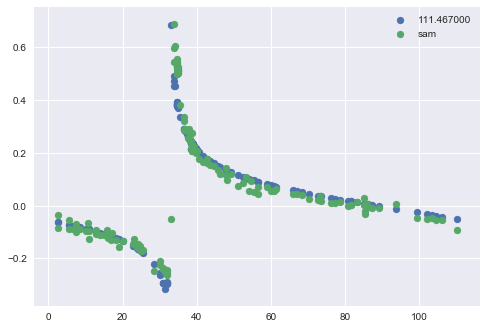

121642.20858727189


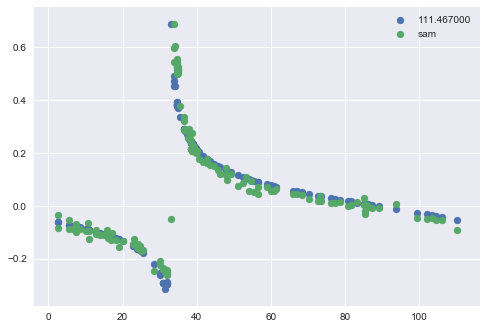

121622.91814650936


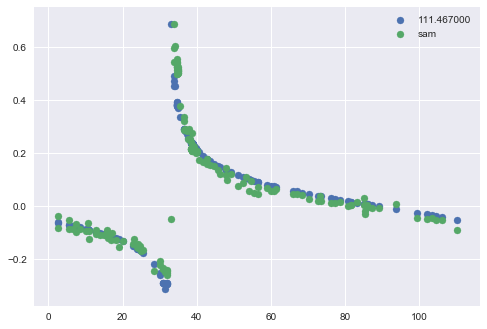

121603.81308805522


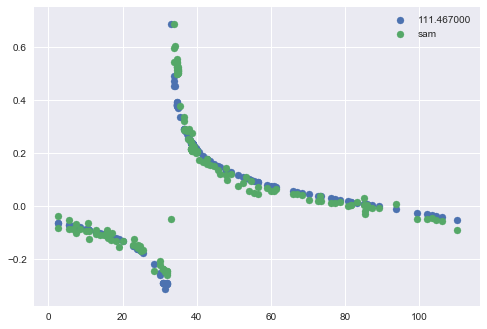

121584.89260036184


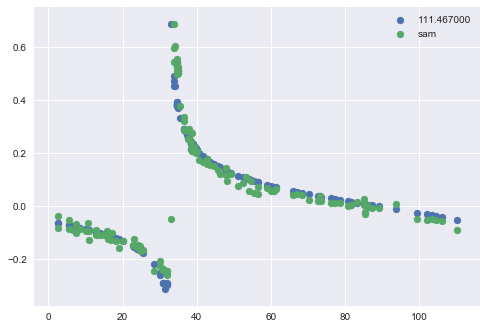

121566.15584257204


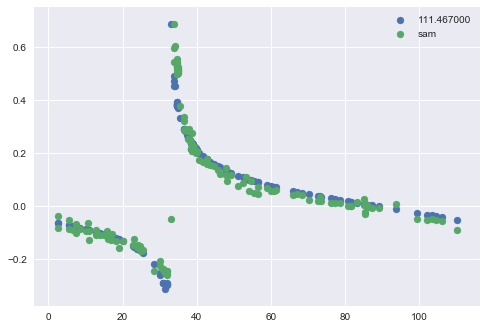

121547.60194540962


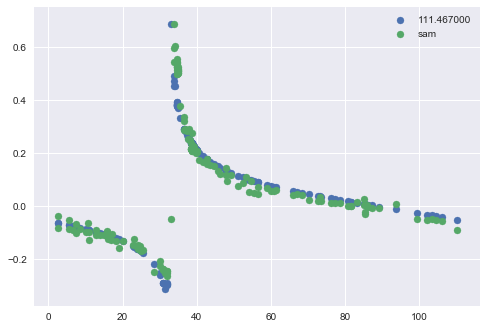

121529.23001204366


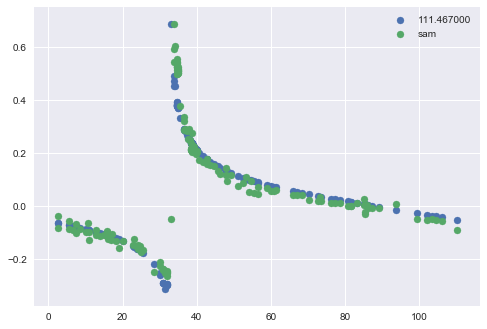

121511.03911898588


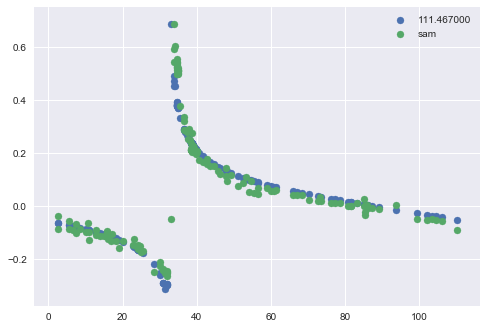

121493.02831698333


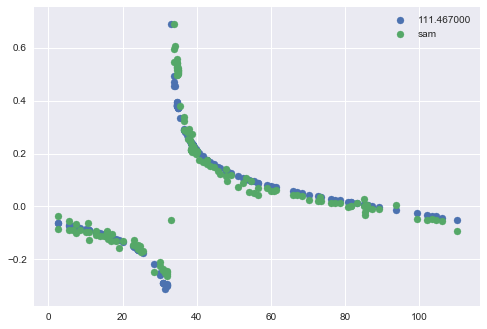

121475.19663191389


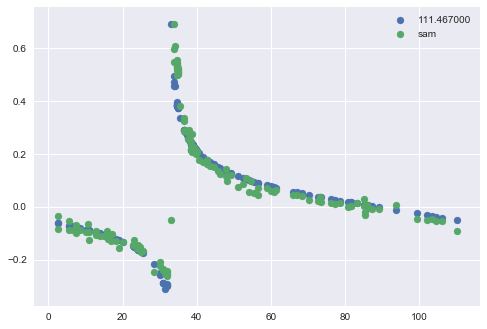

121457.54306567661


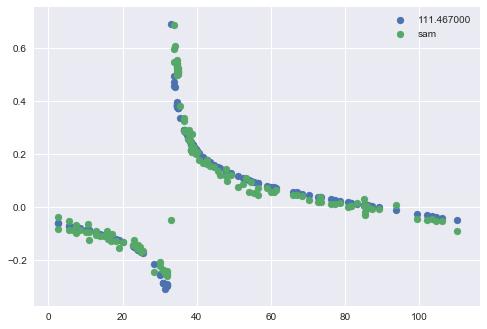

121440.06659709688


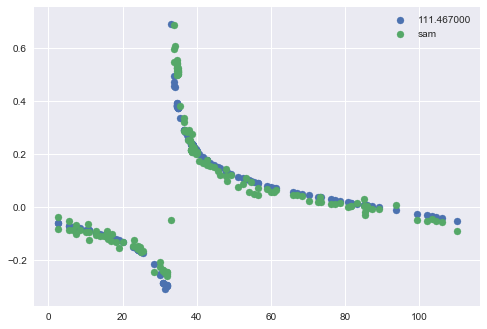

121422.766182828


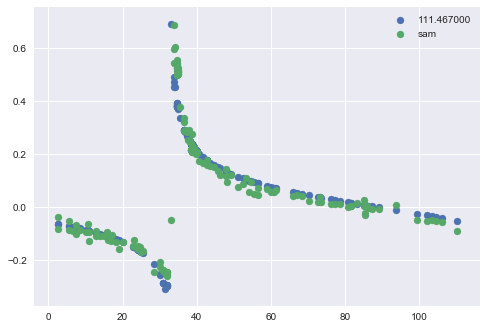

121405.64075825043


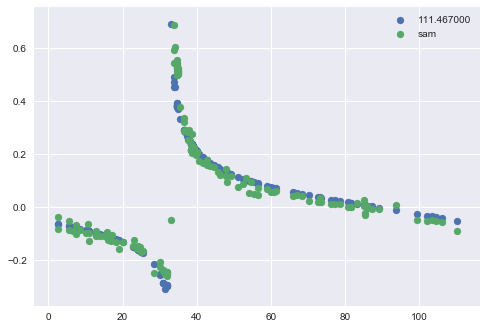

121388.68923836778


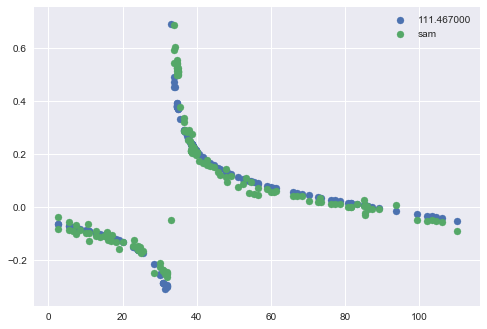

121371.91051870186


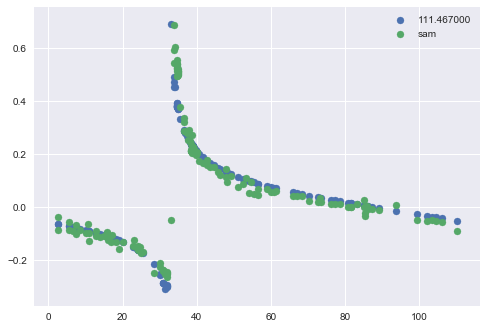

121355.30347619177


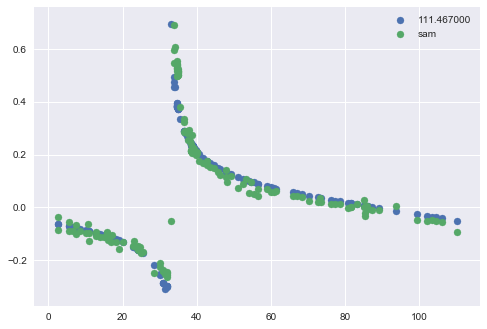

121338.86697008894


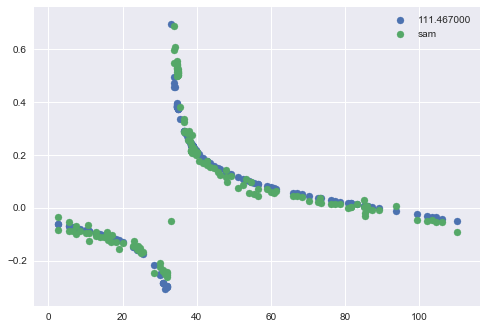

121322.59984282138


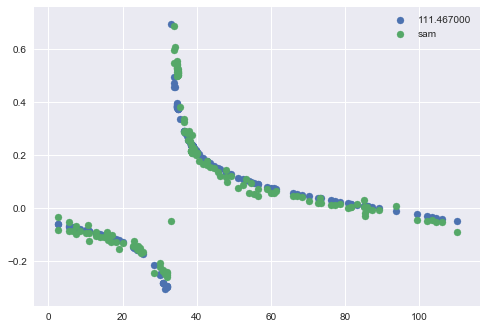

121306.50092089734


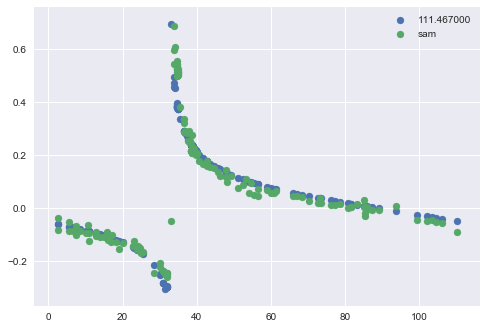

121290.56901576857


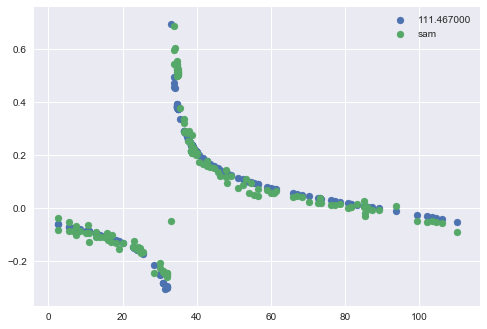

121274.80292469643


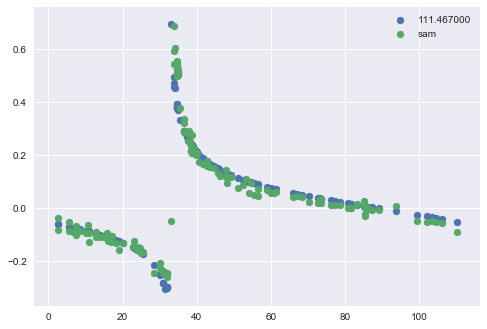

121259.20143160595


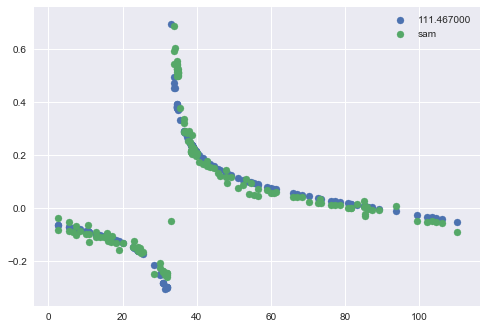

121243.76330795311


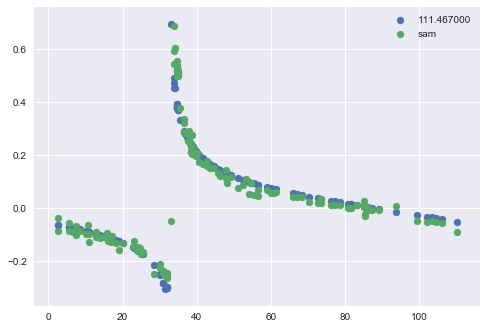

121228.48731354823


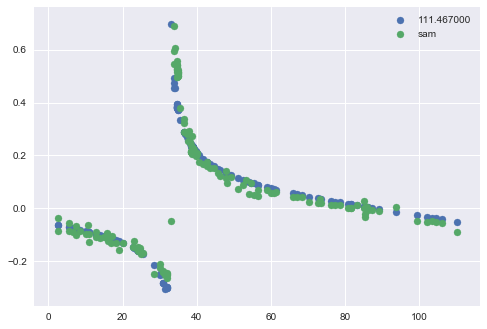

121213.37219739665


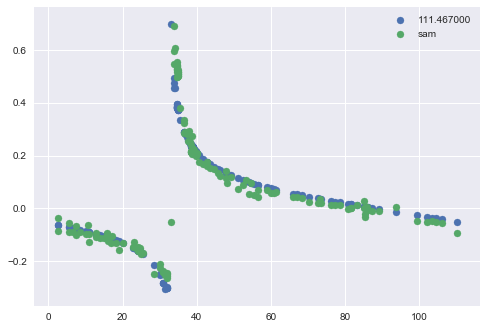

121198.41669851379


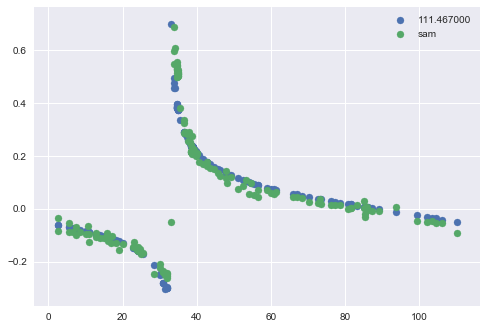

121183.61954676016


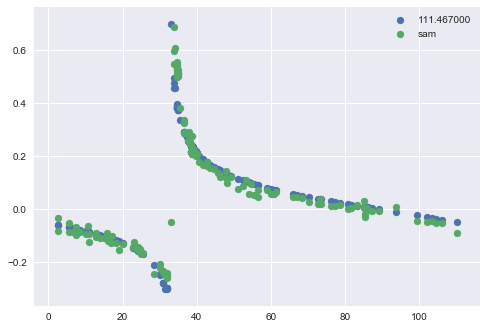

121168.97946515238


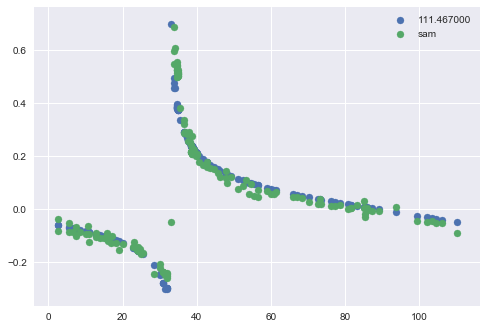

121154.4951644163


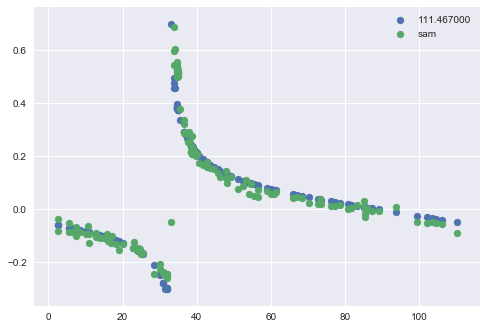

121140.1653532202


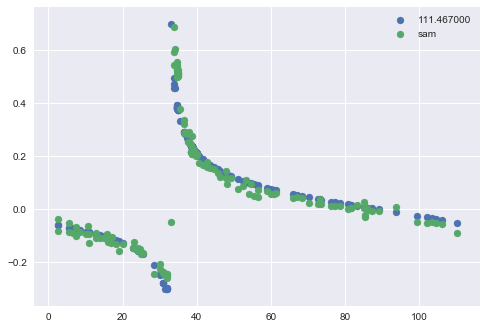

121125.98873257496


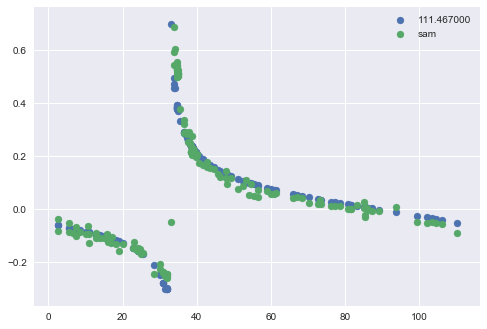

121111.96399818583


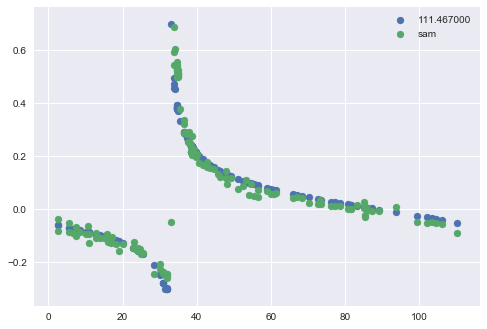

121098.08984119454


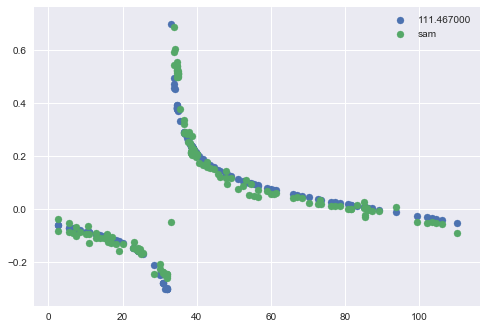

121084.36494887248


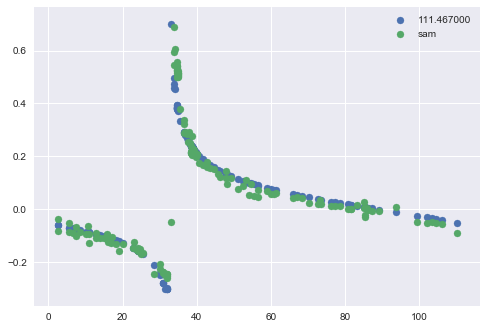

121070.7880053759


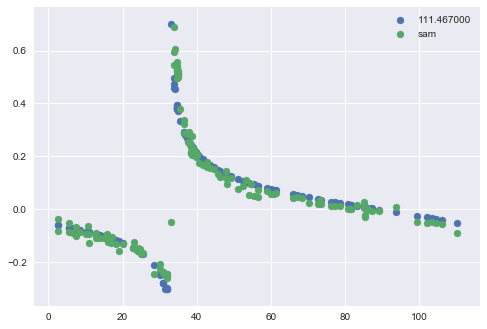

121057.35769236159


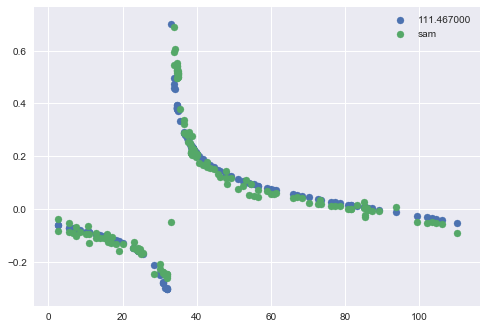

121044.07268972415


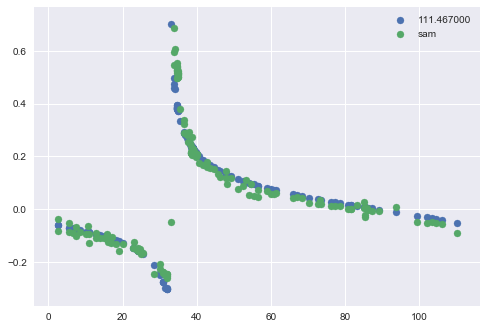

121030.93167624259


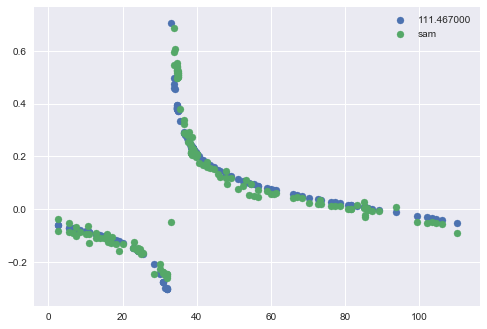

121017.93333019358


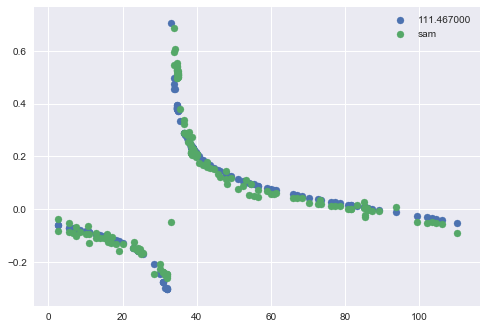

121005.07633000778


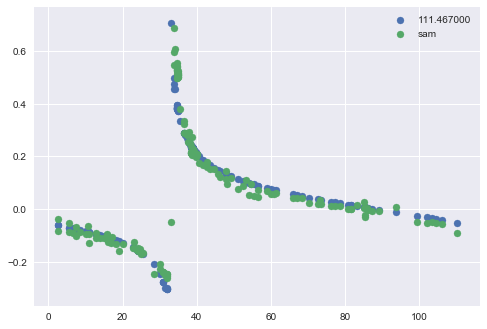

120992.35935489263


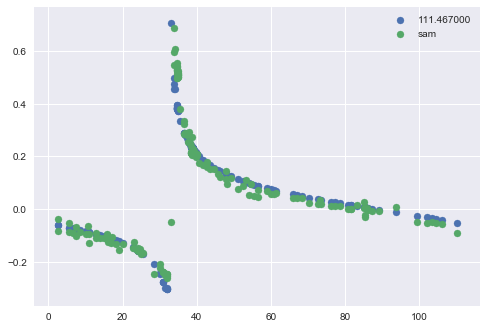

120979.78108536566


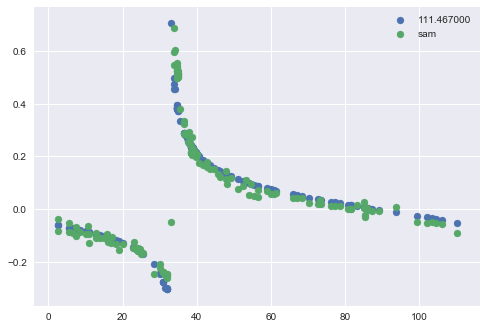

120967.34020390411


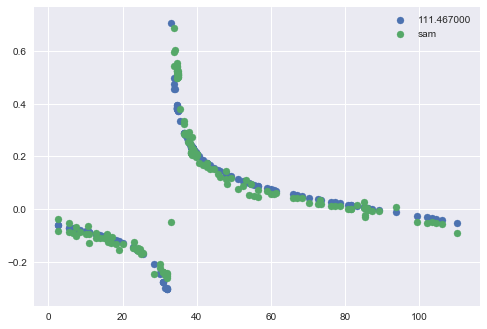

120955.0353954629


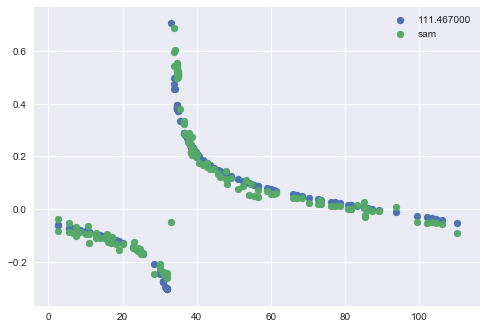

120942.86534803177


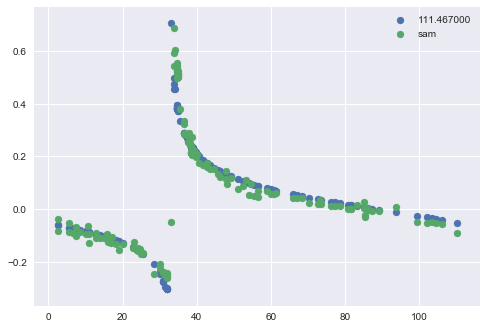

120930.82875316977


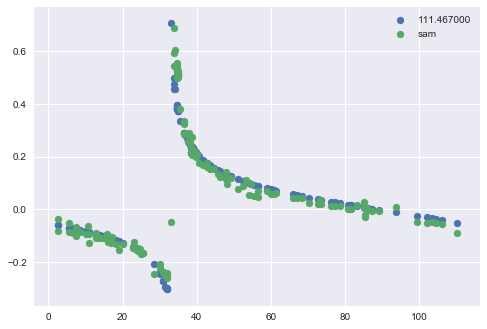

120918.92430650469


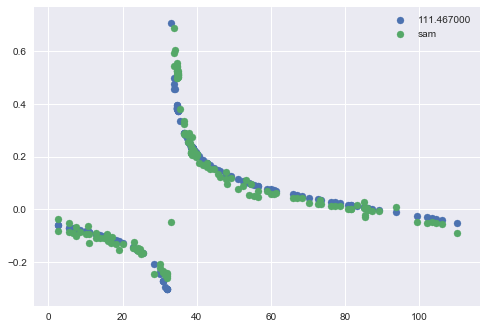

120907.15070820769


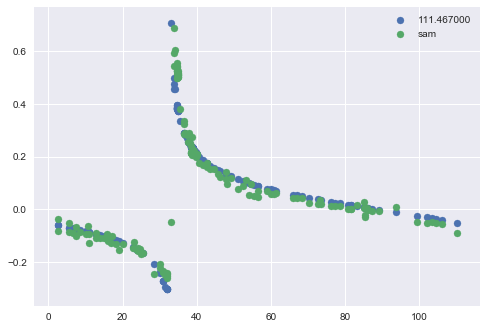

120895.5066635331


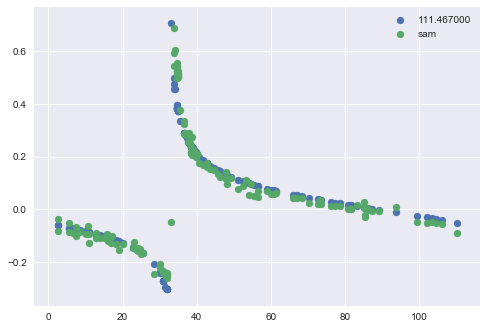

120883.99088321484


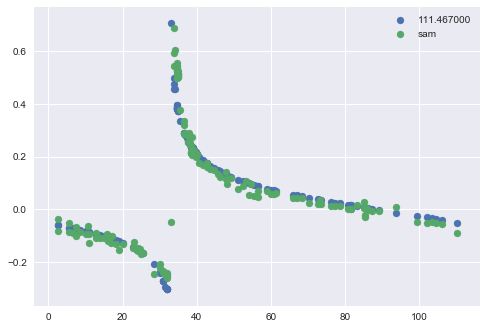

120872.6020839392


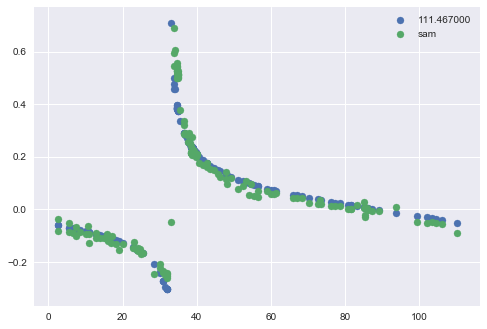

120861.33898878032


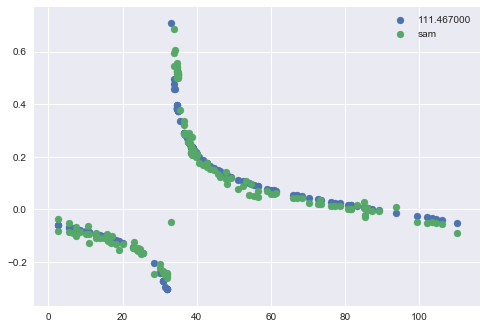

120850.20032755678


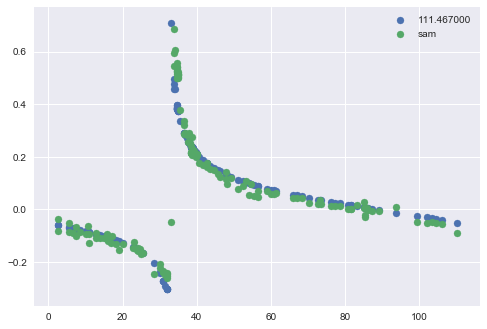

120839.1848373035


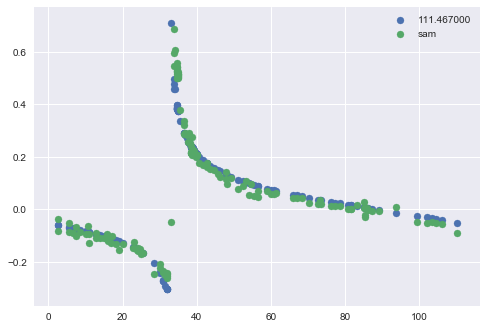

120828.29126260428


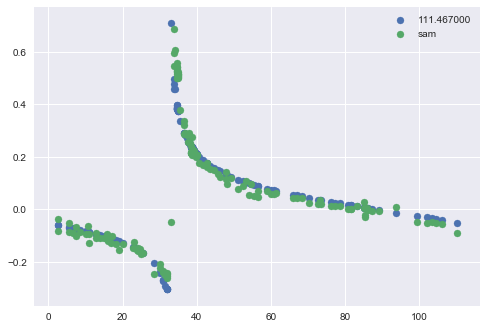

120817.51835591592


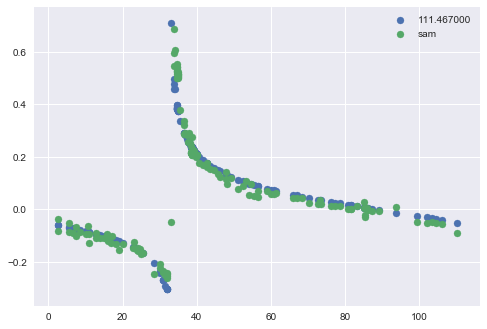

120806.86487804308


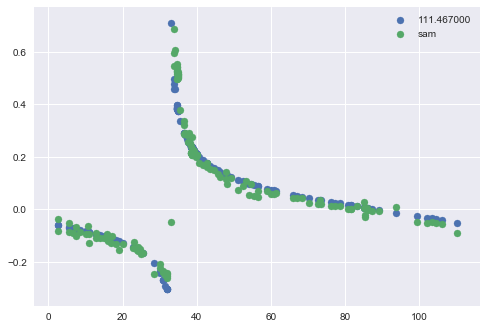

120796.32959830922


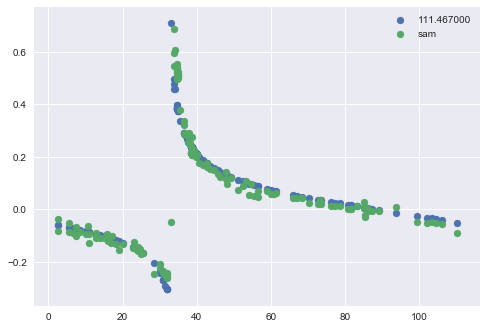

120785.91129491769


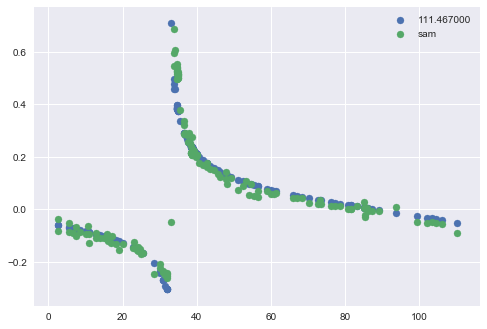

120775.60875530103


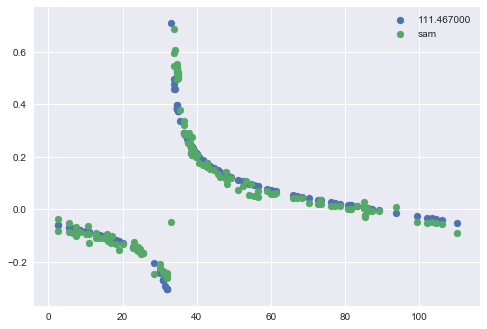

120765.42077647435


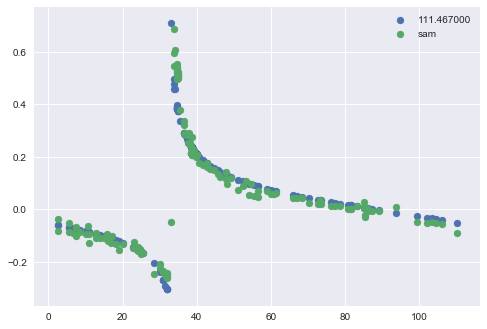

120755.34616506372


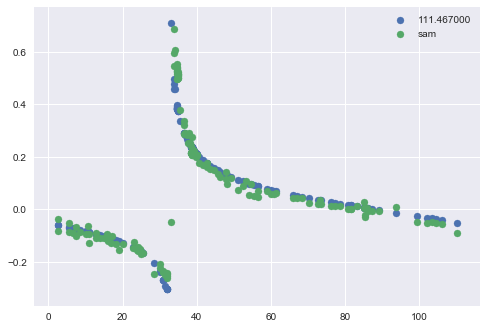

120745.38373770285


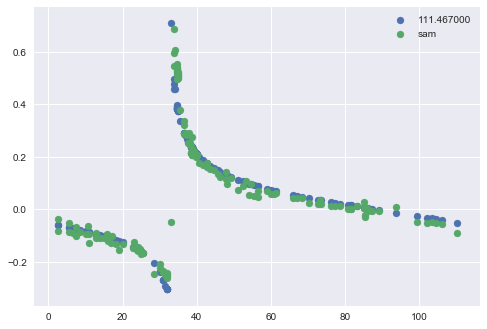

120735.53232125027


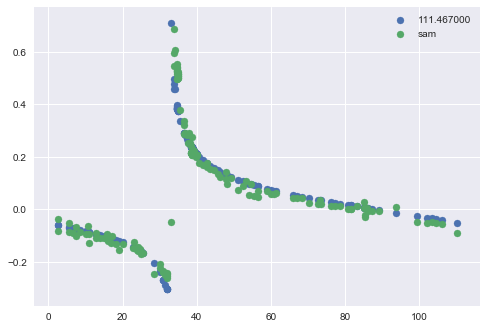

120725.79075316458


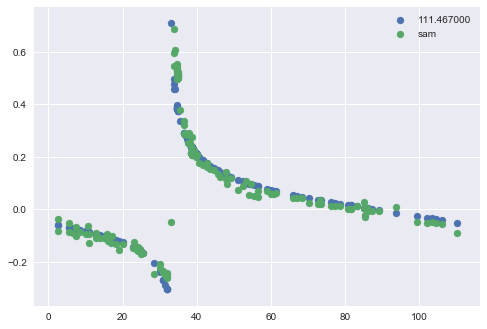

120716.15788146494


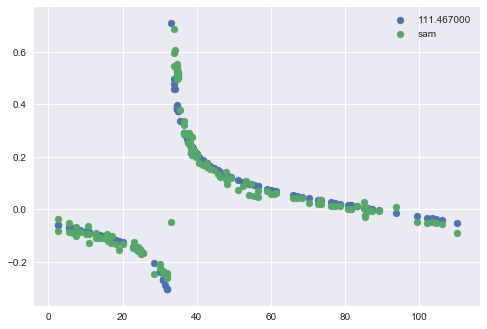

120706.63256504982


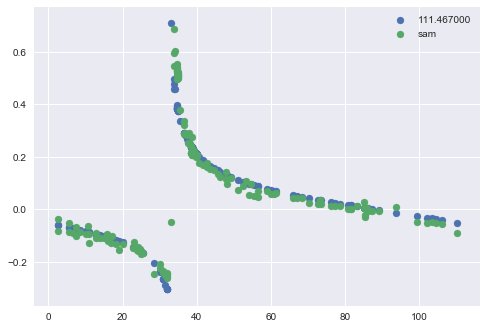

120697.21367380327


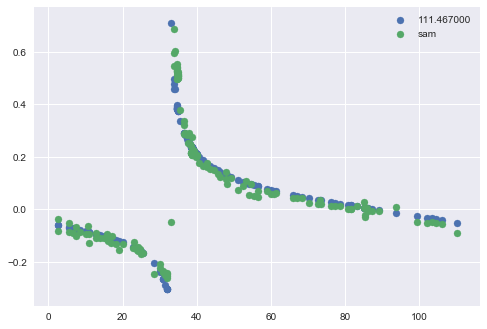

120687.90008899462


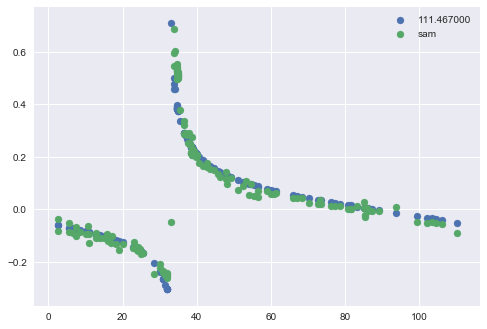

120678.69070295832


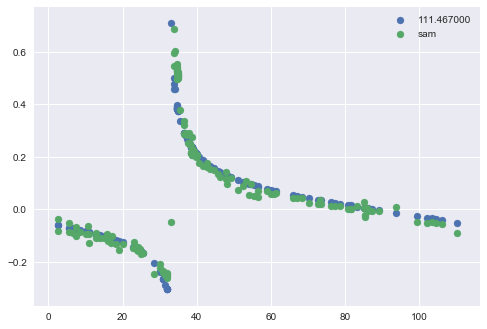

120669.5844195996


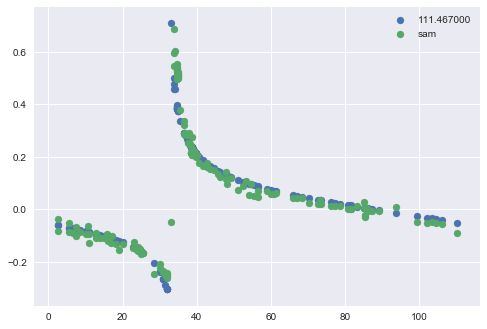

120660.58015543816


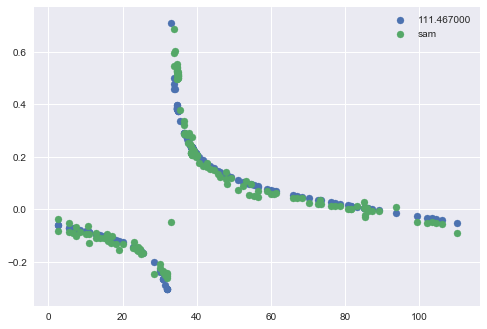

120651.6768370482


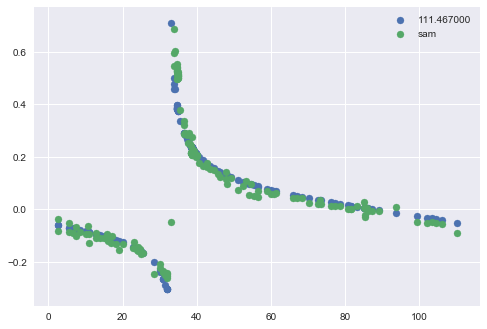

120642.8734022981


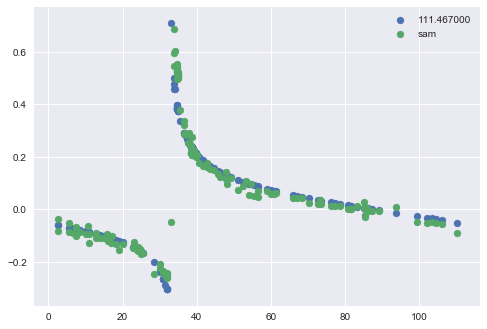

120634.16880621892


In [24]:
best_e = None
best_tp = None
best_fit = 10e14
best_beta = None

potential_e = np.linspace(0.9,0.999,250)
potential_tp = np.linspace(folded_time.min(),folded_time.max(), 250)

for e in potential_e:
    for _,t_p in enumerate(potential_tp):
        beta, chi_sq = obj_func(111.467, e, t_p)
        if chi_sq < best_fit:
            best_e = e
            best_tp = t_p
            best_beta = beta
            best_fit = chi_sq
            M_vector = M(111.467, folded_time, best_tp)
            E_vector = kepler(M_vector, best_e)
            f_vector = f(best_e, E_vector)
            plt.scatter(folded_time,calc_rv(beta[0], beta[1], beta[2], f_vector))
            # plt.scatter(folded_time,calc_rv(calc_h(0.475,5.255), calc_c(0.475,5.255), calc_v0(-0.008,0.475,0.5255), f_vector))
            plt.scatter(folded_time,rv_periodogram,label='sam')
            plt.legend()
            plt.show()
            print(best_fit)

In [25]:
print(best_e)
print(best_tp)
print(best_beta)
print(best_fit)

0.999
32.346387951867996
[20.32811672  3.53298214 20.32723329]
120634.16880621892


In [ ]:
from scipy.optimize import minimize

x_init = np.asarray([111.47594759475948, 0.9388, 10.625])

minimize(obj_func, x_init, method='nelder-mead',
         options={'xtol': 1e-12, 'disp': True})

In [26]:
# We define a series of function to convert our placeholder regression parameters 
# to the parameters we want: K, pomega, and gamma.

# h = K_star * cos(pomega)
#
# c = -K_star * sin(pomega)
#
# v_0 = gamma + K_star * cos(pomega)

def calc_K(h, c):
    return np.sqrt(h**2 + c**2)

def calc_pomega(h, K):
    return np.arccos(h/K)

def calc_gamma(h, v_0, e):
    return v_0 - e * h

def calc_h(K, pomega):
    return K * np.cos(pomega)

def calc_c(K, pomega):
    return -K * np.sin(pomega)

def calc_v0(gamma, K, pomega):
    return gamma + K * np.cos(pomega)

In [ ]:
beta, x2 = solve_hcv(folded_time, rv_periodogram, rv_err_folded , 86.414123  ,  0.99999218, 56.88773969)



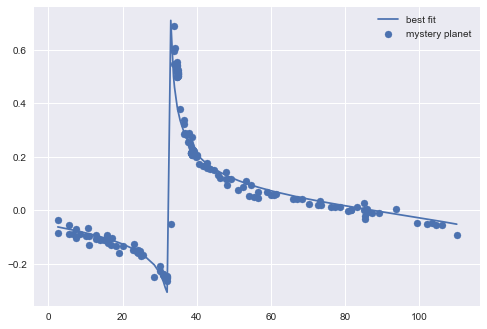

In [29]:
M_vector = M(111.467, folded_time, best_tp)
E_vector = kepler(M_vector, best_e)
f_vector = f(best_e, E_vector)
plt.plot(folded_time,calc_rv(best_beta[0], best_beta[1], best_beta[2], f_vector), label='best fit')
# plt.scatter(folded_time,calc_rv(calc_h(0.475,5.255), calc_c(0.475,5.255), calc_v0(-0.008,0.475,0.5255), f_vector))
plt.plot(folded_time,rv_periodogram,label='mystery planet')
plt.legend()